## About Dataset 

### Dataset Name : House Price Prediction Dataset

The dataset provided contains comprehensive information about various attributes related to residential properties in Ames, Iowa, which were sold during a specific period. These attributes cover a wide range of features that describe each property's physical characteristics, location, condition, and utility details.


---

### Variable Descriptions in Ames Housing Dataset

#### MSSubClass
The MSSubClass variable categorizes the type of dwelling involved in each sale, ranging from single-family homes to multi-level and duplex structures. Each subclass is identified by a numeric code and a descriptive label, providing insights into the architectural style and age of the property.

#### MSZoning
The MSZoning variable denotes the general zoning classification for each property sale, distinguishing between different types such as residential low-density, commercial, or agricultural zones. This classification is crucial for understanding the permissible land use and potential restrictions applicable to each property.

#### LotFrontage and LotArea
- **LotFrontage**: Numerical data on the linear feet of street connected to each property.
- **LotArea**: Total lot size in square feet. These measurements are fundamental in assessing the size and layout of each property.

#### Street and Alley
- **Street**: Type of road access to each property, indicating whether access is paved or gravel.
- **Alley**: Type of alley access, if available, detailing paved, gravel, or no access.

#### LotShape and LandContour
- **LotShape**: Categorical variable describing the general shape of properties, ranging from regular to irregular configurations.
- **LandContour**: Categorical variable indicating the flatness of properties, categorized as flat, sloped, or depressed terrains.

#### Utilities
The Utilities variable distinguishes properties with all public utilities (electricity, gas, water, and sewer) versus those with partial or no sewer services. This information is crucial for potential buyers considering the convenience and cost of utility services.

#### LotConfig
The LotConfig variable categorizes properties based on their lot configuration, such as inside a block, at a corner, in a cul-de-sac, or having frontage on multiple sides. This classification helps in understanding the property's position within its neighborhood.

#### LandSlope
The LandSlope variable provides insights into the slope of each property, categorized as gentle, moderate, or severe. This attribute is significant for assessing landscaping possibilities, drainage considerations, and potential construction challenges.

#### Neighborhood
The Neighborhood variable identifies the specific physical location of each property within Ames, Iowa, offering insights into neighborhood demographics, amenities, and overall desirability.

#### Condition1 and Condition2
- **Condition1**: Proximity of each property to various conditions such as arterial streets, railroads, or positive off-site features like parks.
- **Condition2**: Additional proximity condition (if applicable).

#### BldgType and HouseStyle
- **BldgType**: Type of building, distinguishing between single-family homes, townhouses, duplexes, etc.
- **HouseStyle**: Architectural style of each dwelling, including styles like split-level or two-story structures.

#### OverallQual and OverallCond
- **OverallQual**: Overall material and finish quality rating.
- **OverallCond**: Overall condition rating on a scale from 1 (poor) to 10 (excellent).

#### YearBuilt and YearRemodAdd
- **YearBuilt**: Original construction date of each property.
- **YearRemodAdd**: Remodel date, if any, indicating updates to the property.

#### Exterior Attributes
- **RoofStyle, RoofMatl**: Roof style and material.
- **Exterior1st, Exterior2nd**: Exterior covering on the house.
- **MasVnrType, MasVnrArea**: Masonry veneer type and area.
- **ExterQual, ExterCond**: Quality and condition ratings of the exterior materials.

---

In conclusion, this dataset provides a comprehensive view of various factors influencing residential property sales in Ames, Iowa. These attributes encompass physical characteristics, location details, quality assessments, and utility provisions, offering valuable insights for stakeholders such as real estate agents, property developers, and prospective buyers or sellers in making informed decisions. prospective buyers or sellers in making informed decisions. and prospective buyers or sellers in making informed decisions.

## Code Demonstration

### Importing the Required Libraries for this Machine Leaning Task

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
from scipy.stats import chi2_contingency, pearsonr
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

### Import the dataset: Load the data into your analysis environment.

In [2]:
data=pd.read_csv("houseprice.csv")

### Display records: Show the first 5 and last 5 records of the dataset.

In [3]:
print("First 5 records:")
data.head()

First 5 records:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
print("Last 5 records:")
data.tail()

Last 5 records:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


### Identify data types: Check and note the data types for each variable.

In [5]:
print("Data types:")
data.dtypes


Data types:


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

### Missing entries: Determine the number of missing entries per variable.

In [6]:
print("Number of missing entries per variable:")
data.isnull().sum()

Number of missing entries per variable:


Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

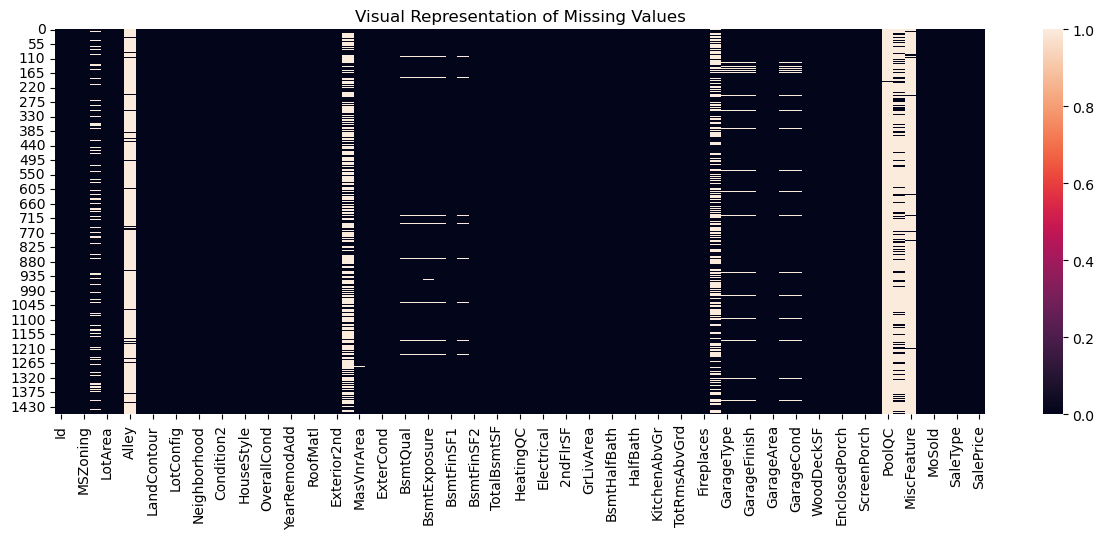

In [7]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isnull());
plt.title("Visual Representation of Missing Values");

### Duplicate records: Identify and count any duplicate records.

In [8]:
duplicate_records = data.duplicated()
print("Duplicate records found:", duplicate_records.sum())

Duplicate records found: 0


### Univariate analysis: Conduct this analysis on all variables, creating appropriate visualizations.

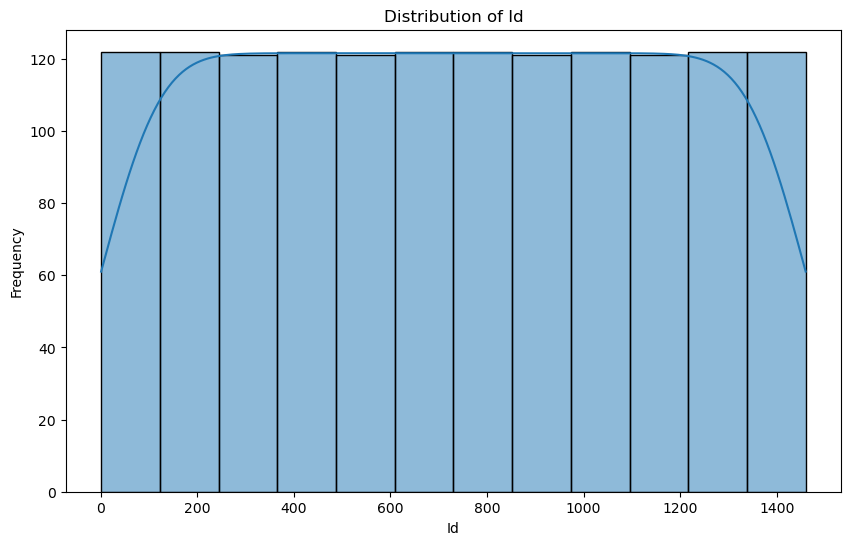

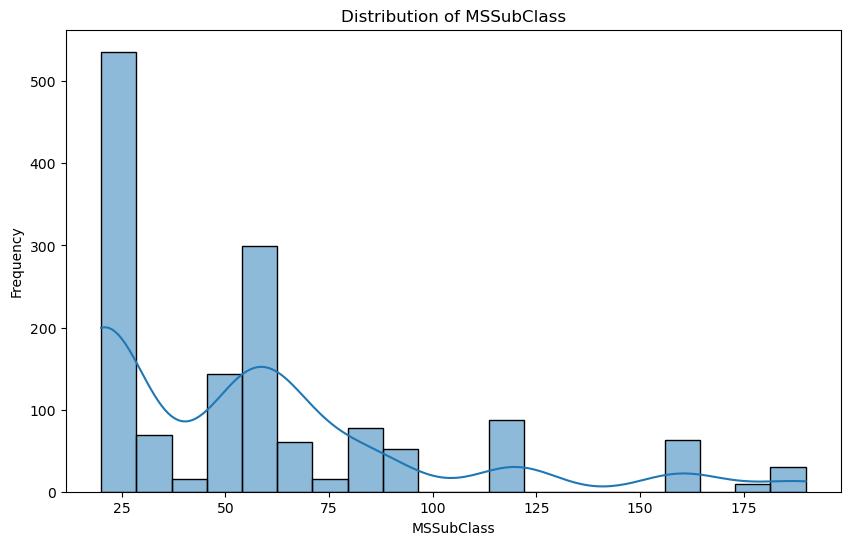

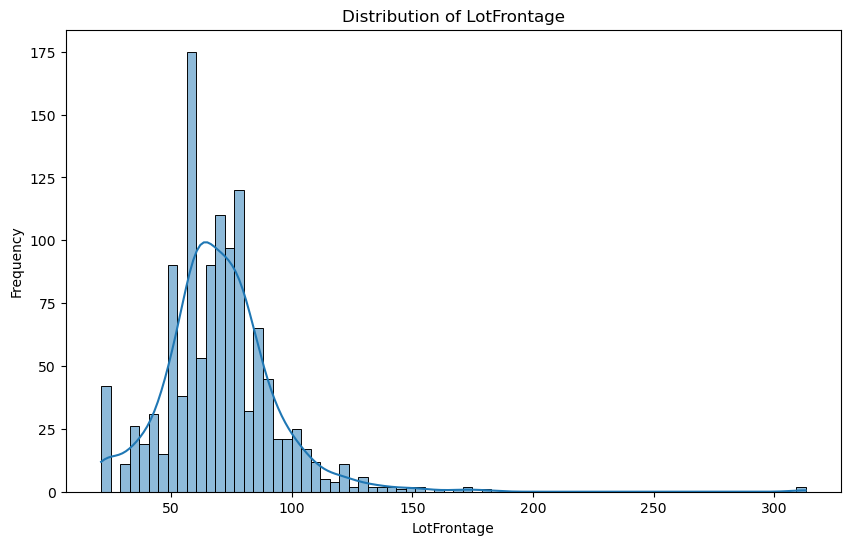

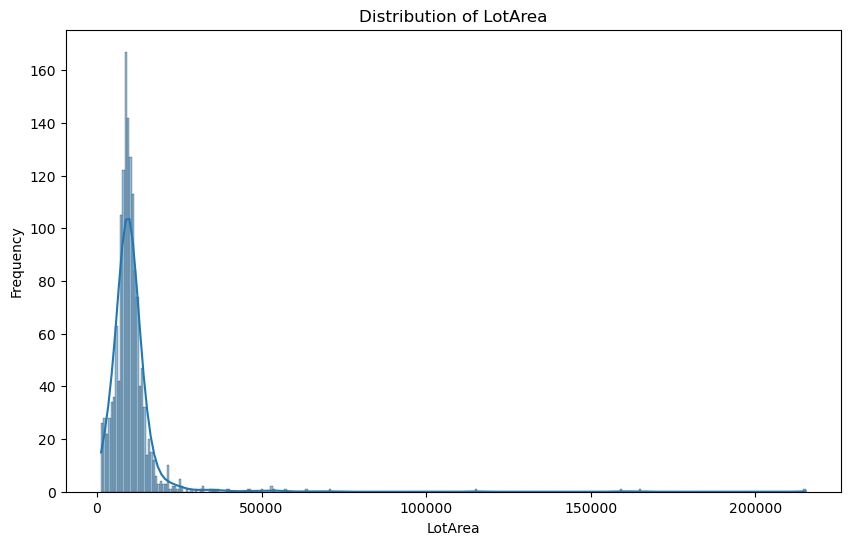

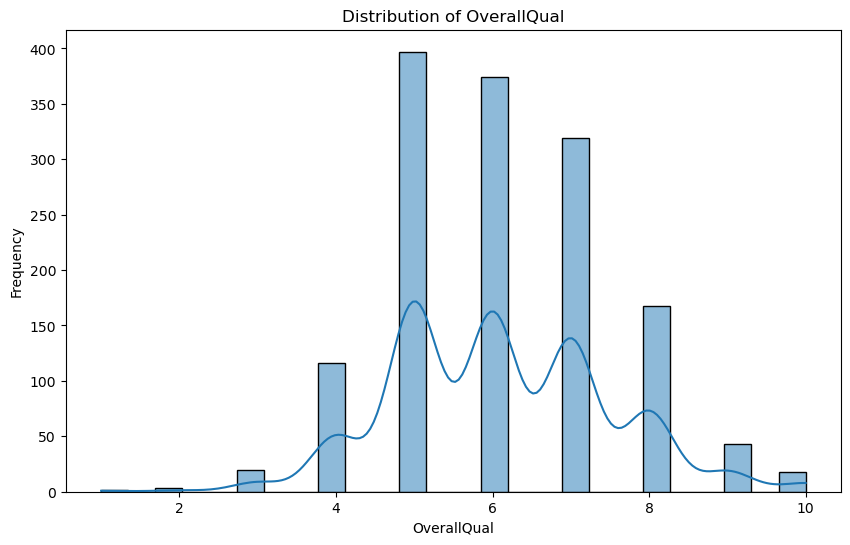

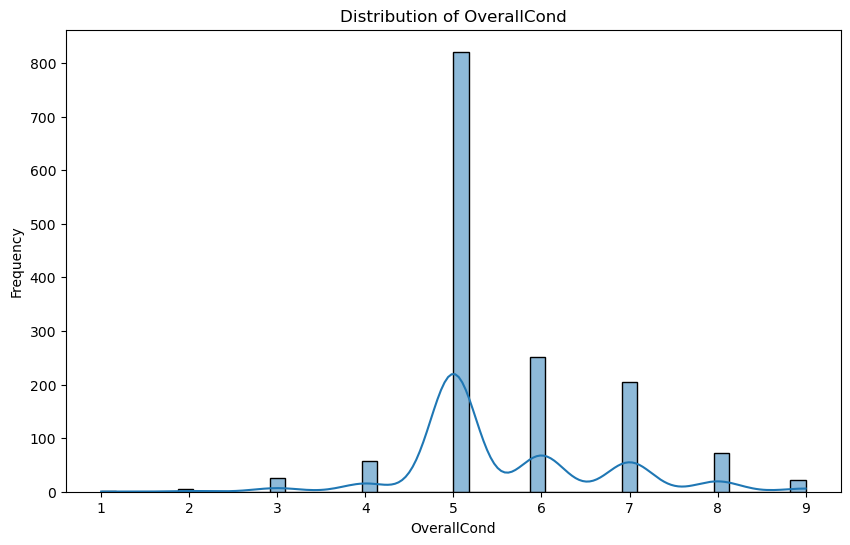

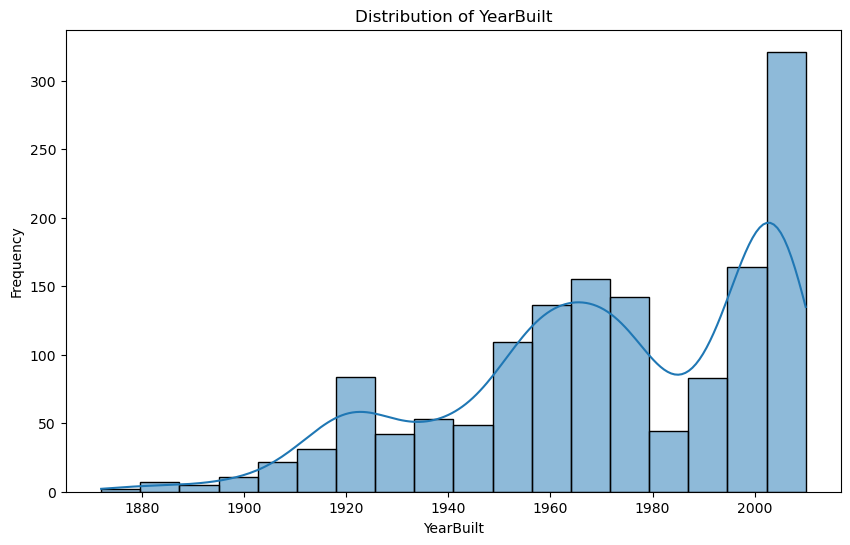

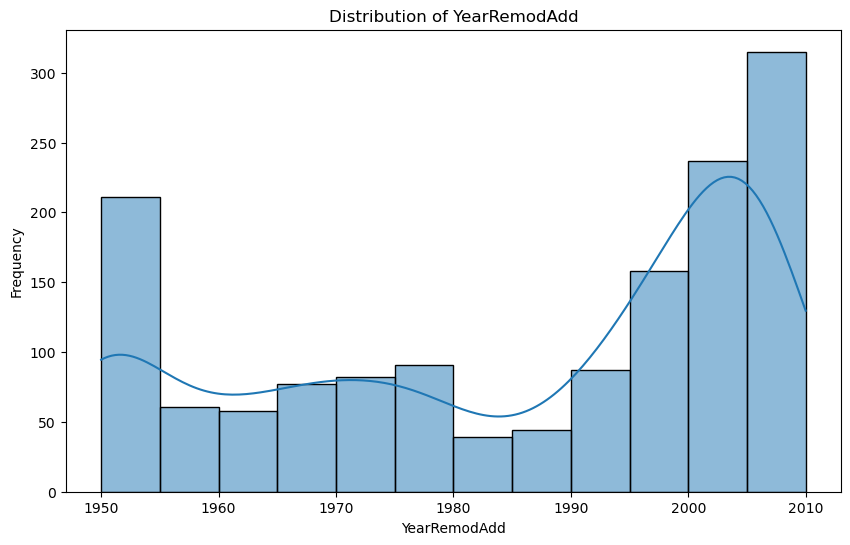

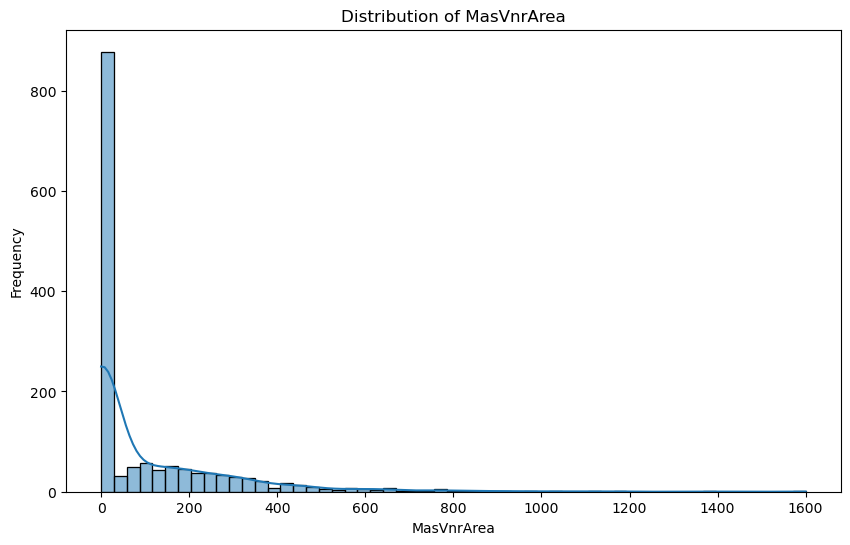

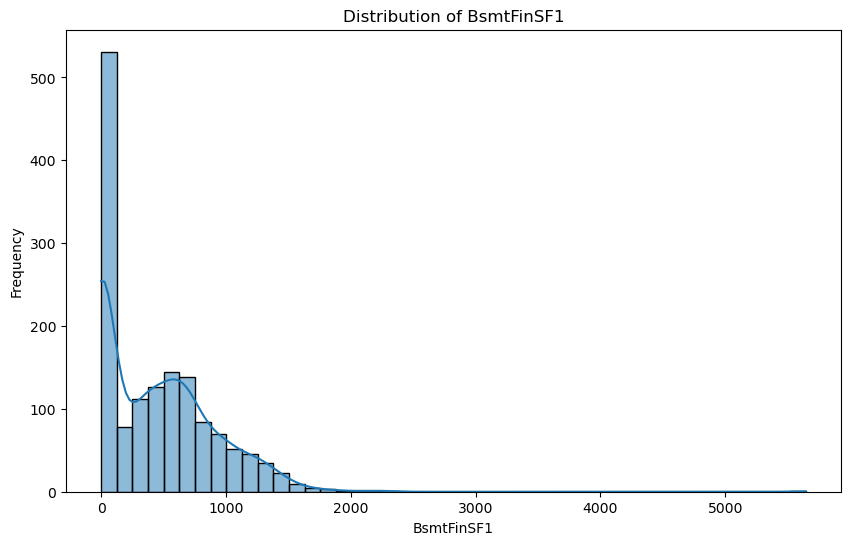

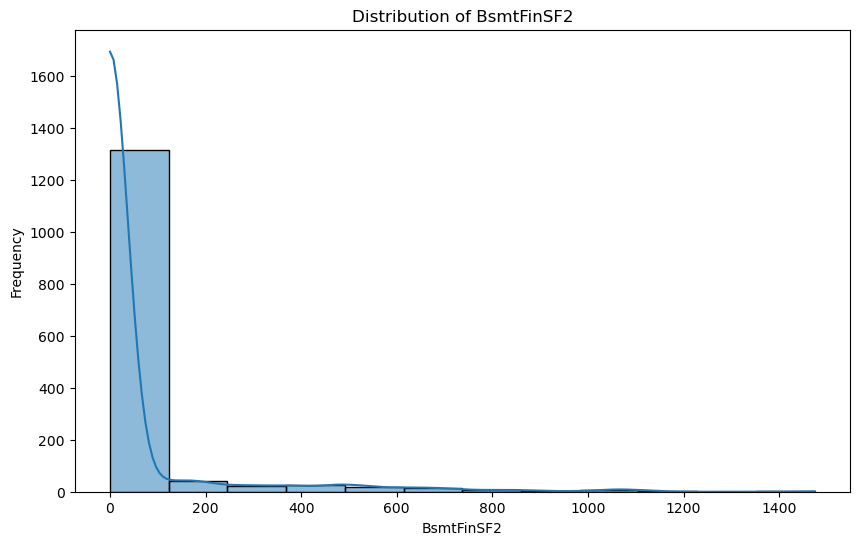

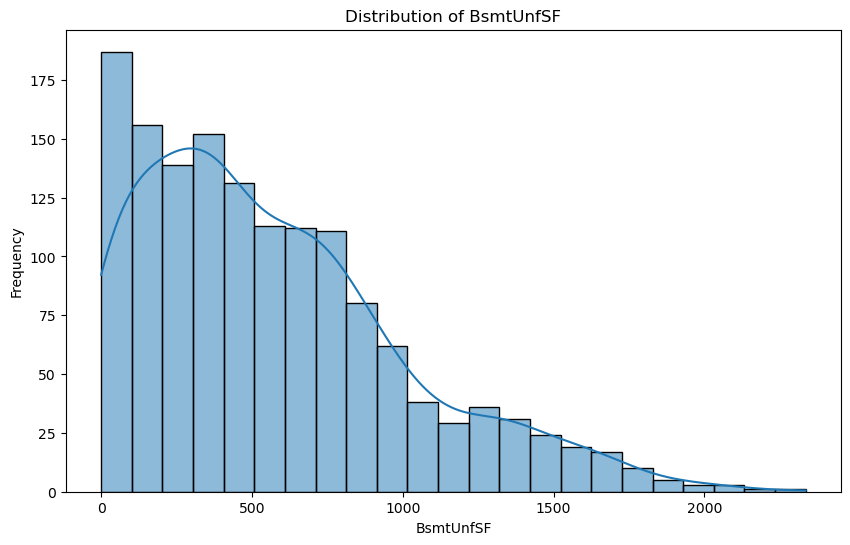

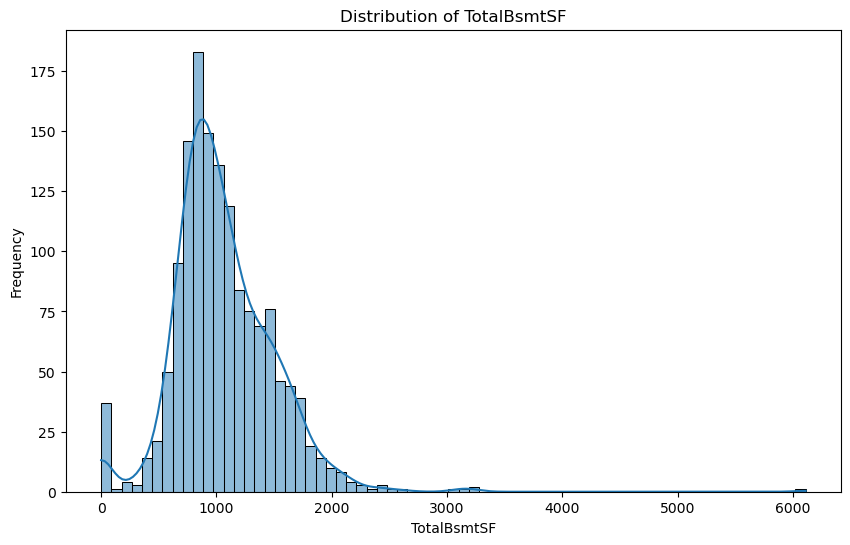

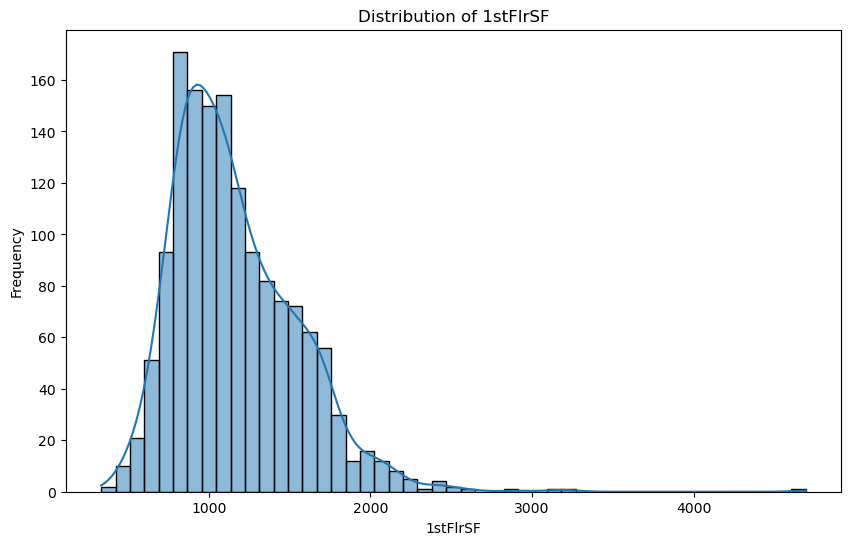

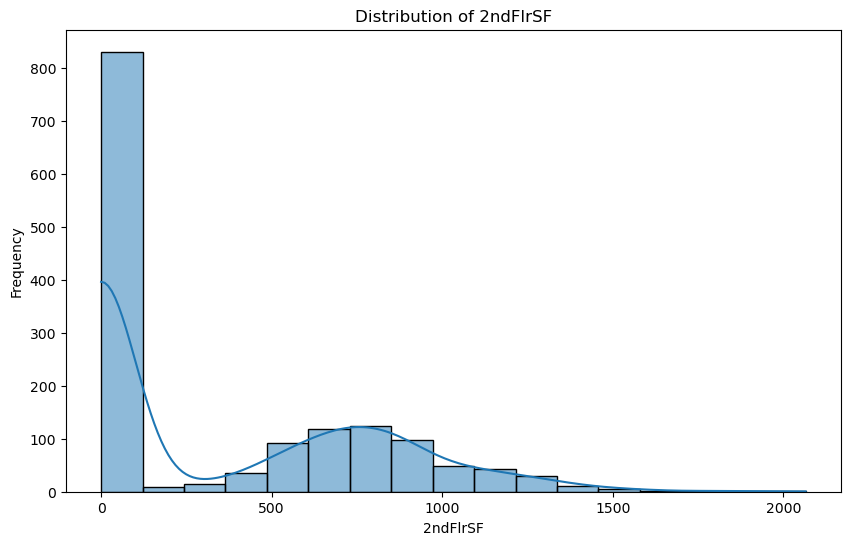

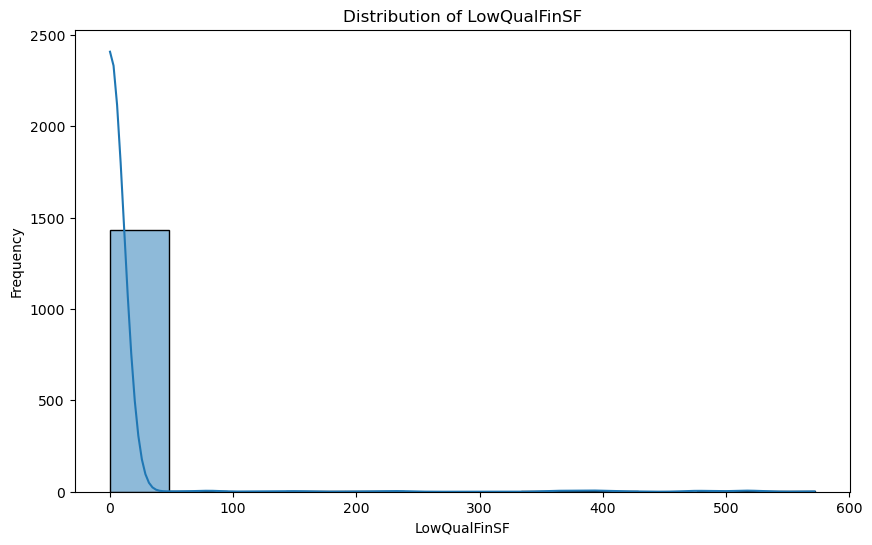

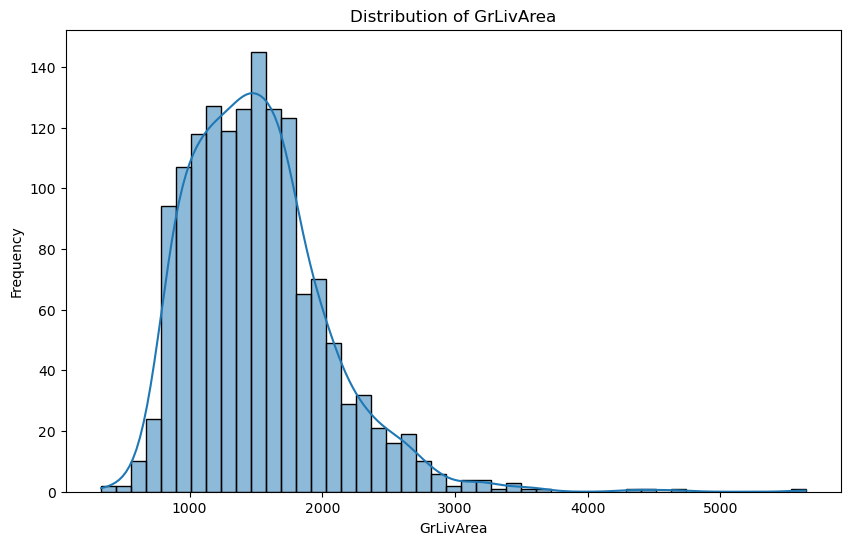

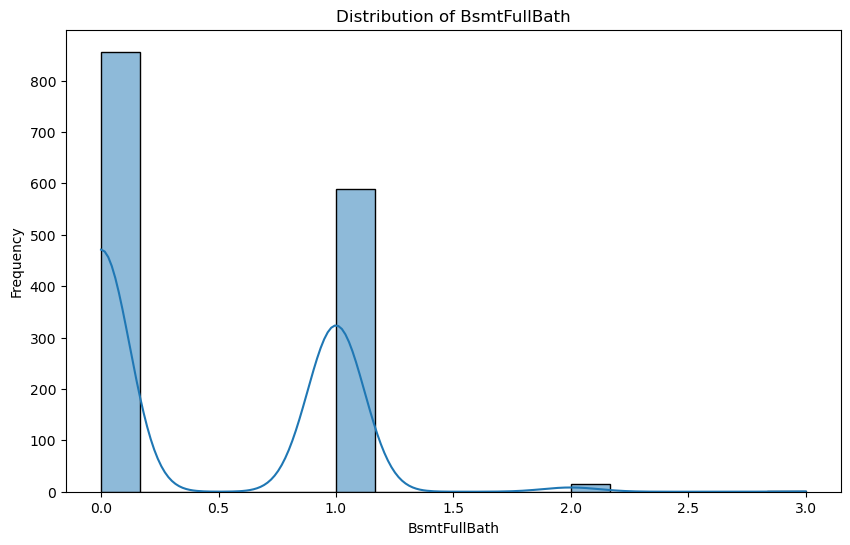

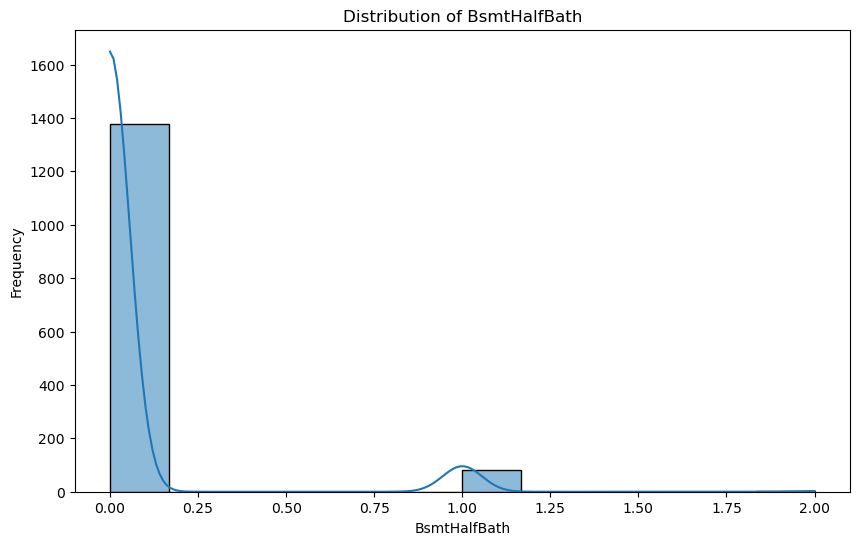

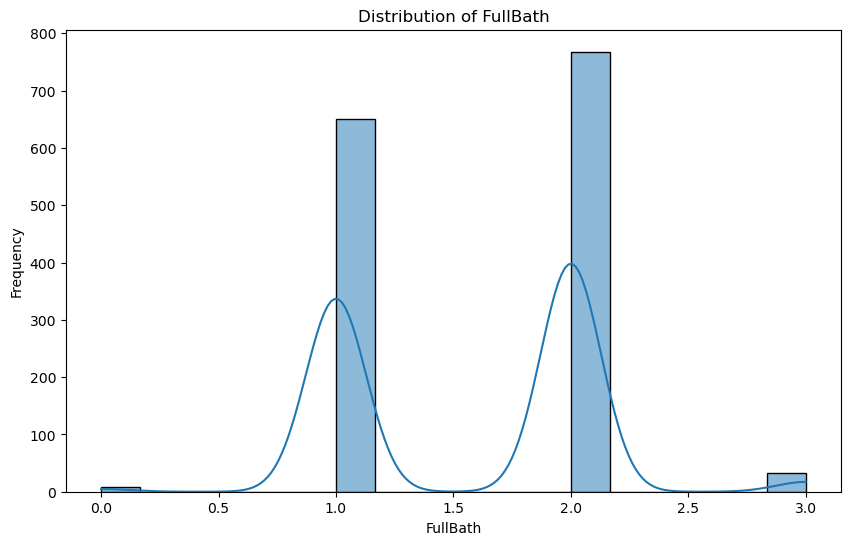

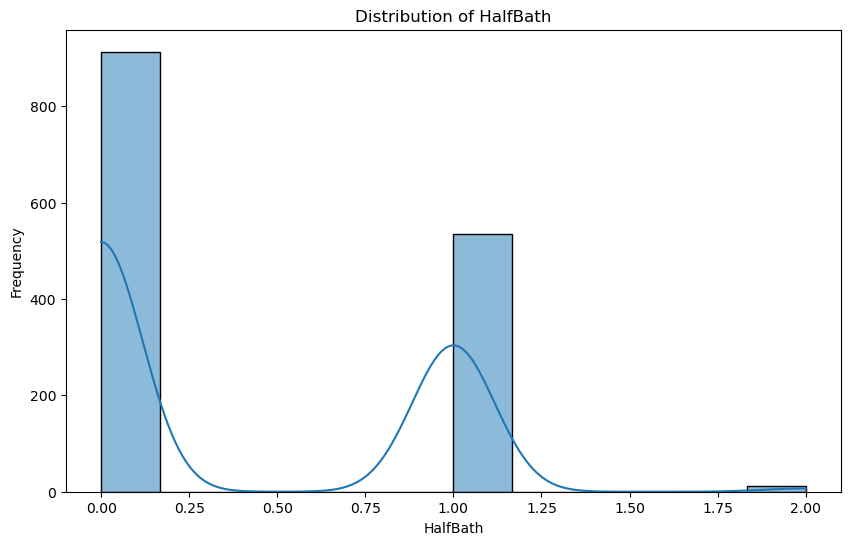

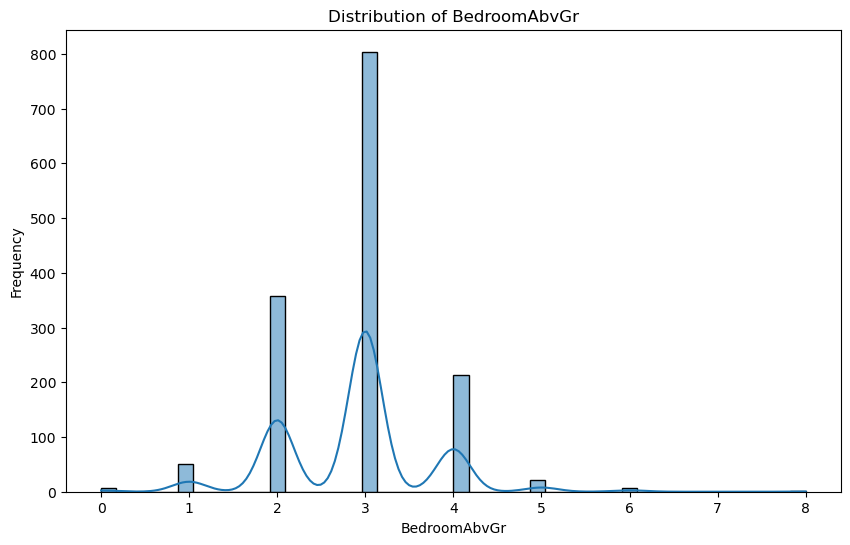

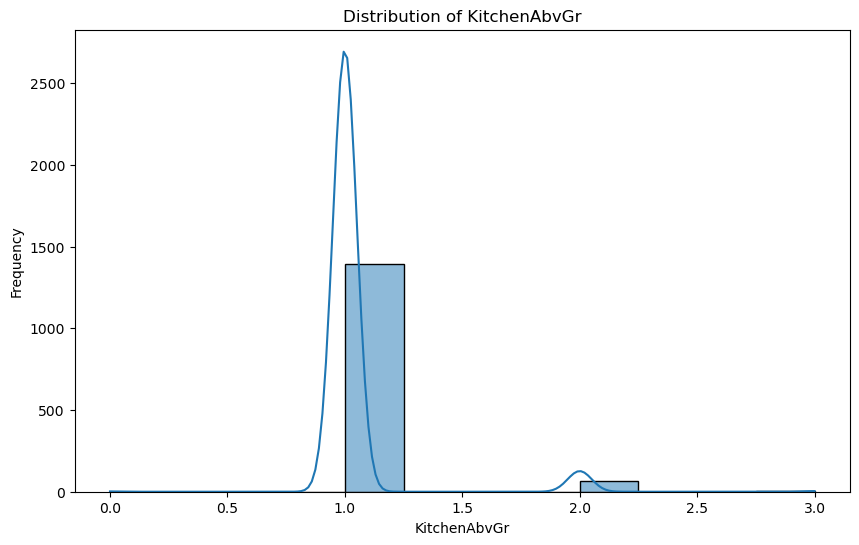

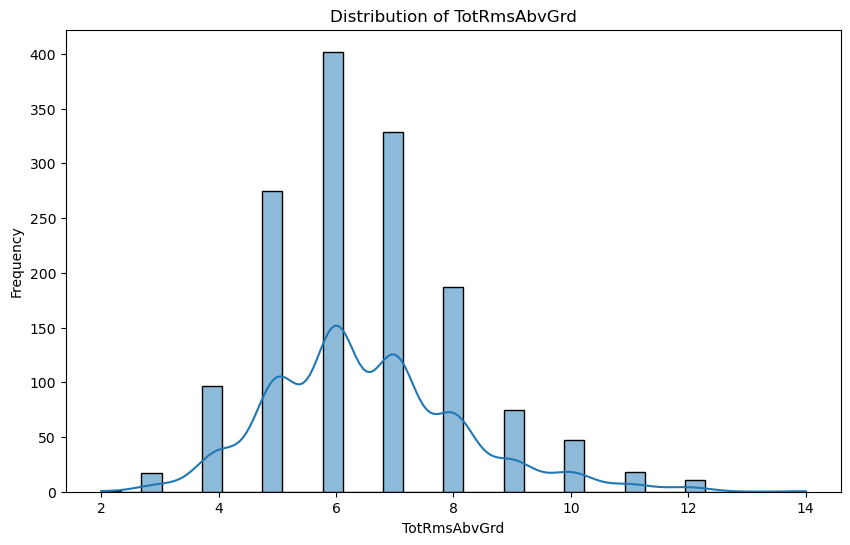

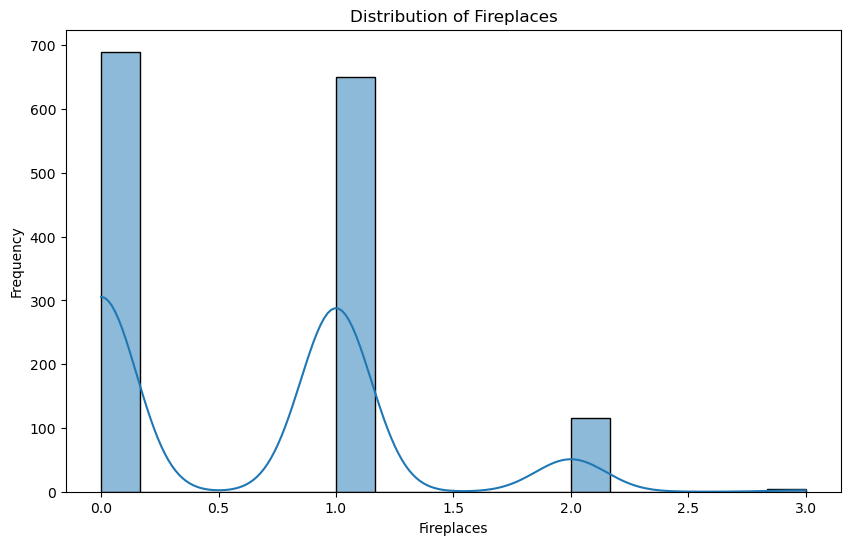

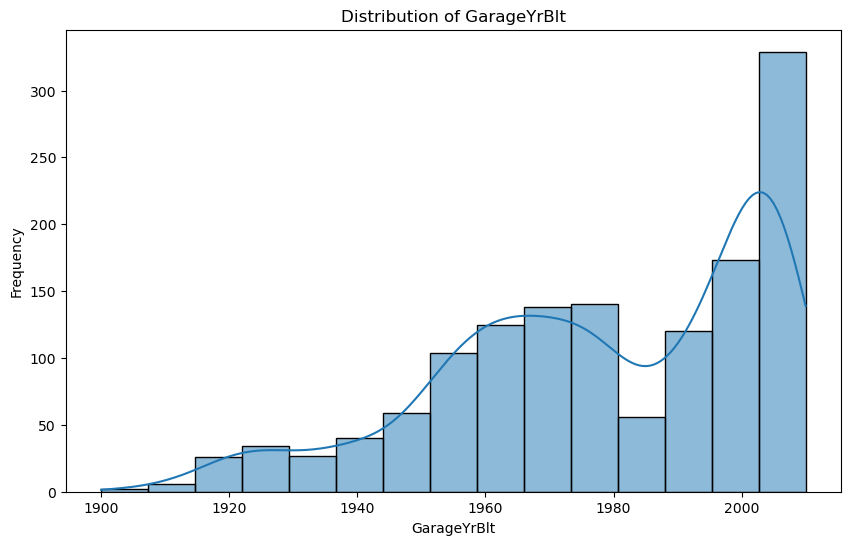

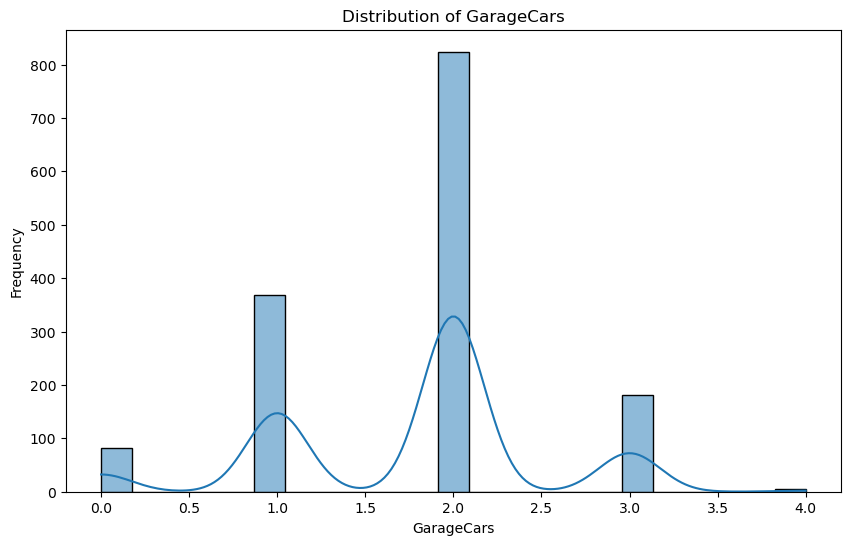

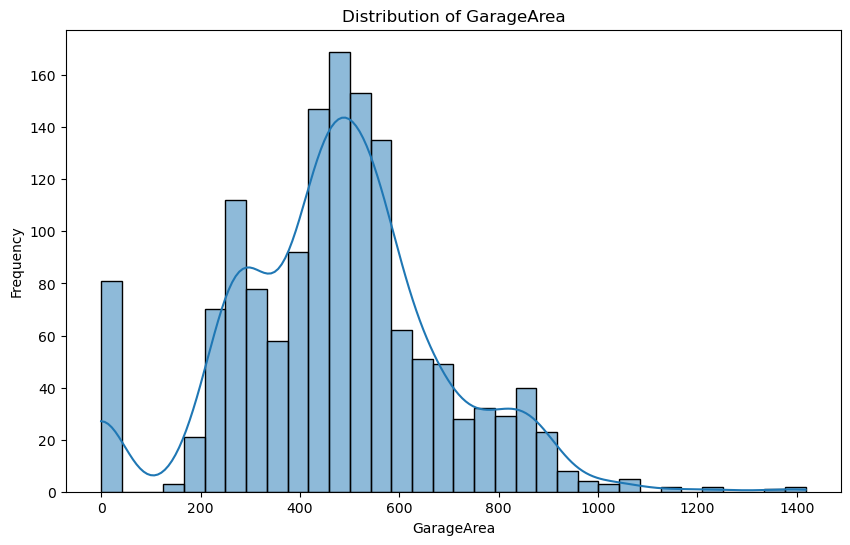

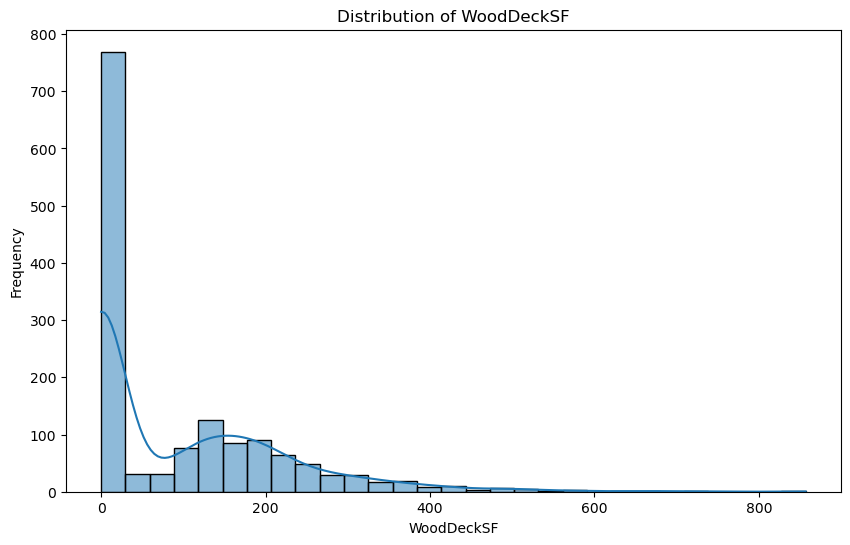

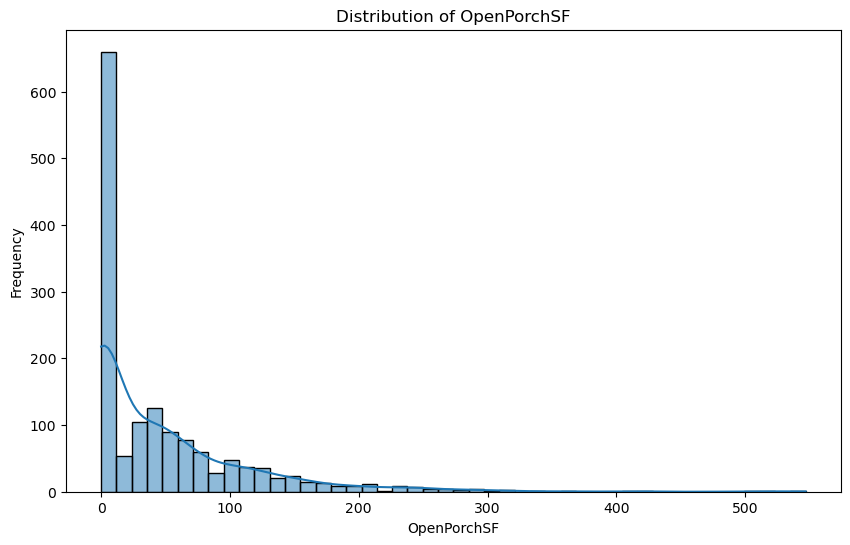

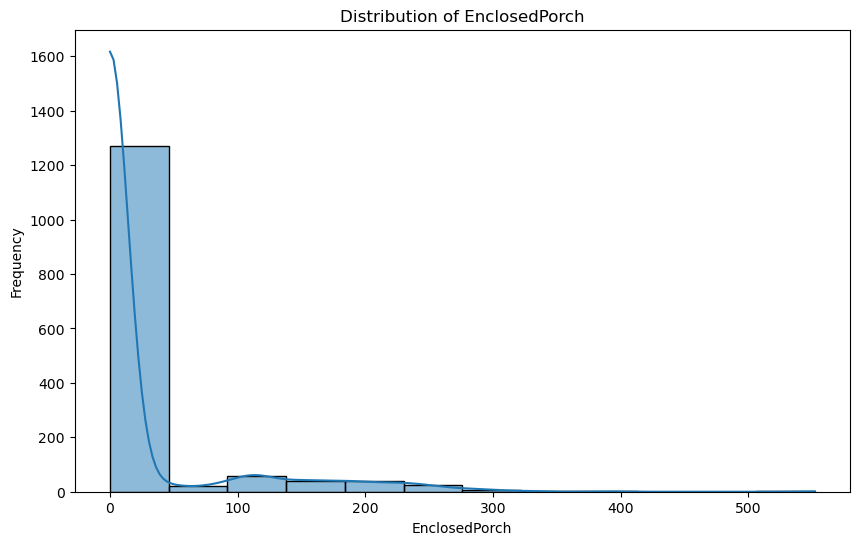

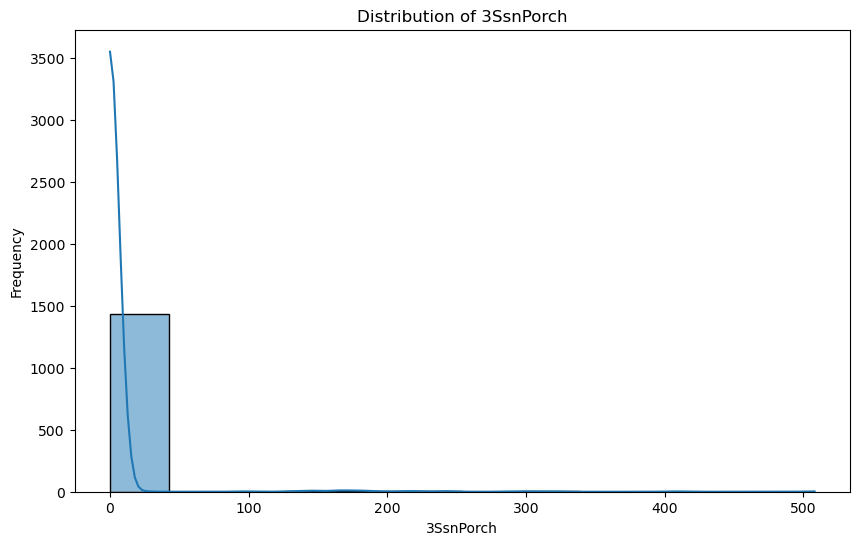

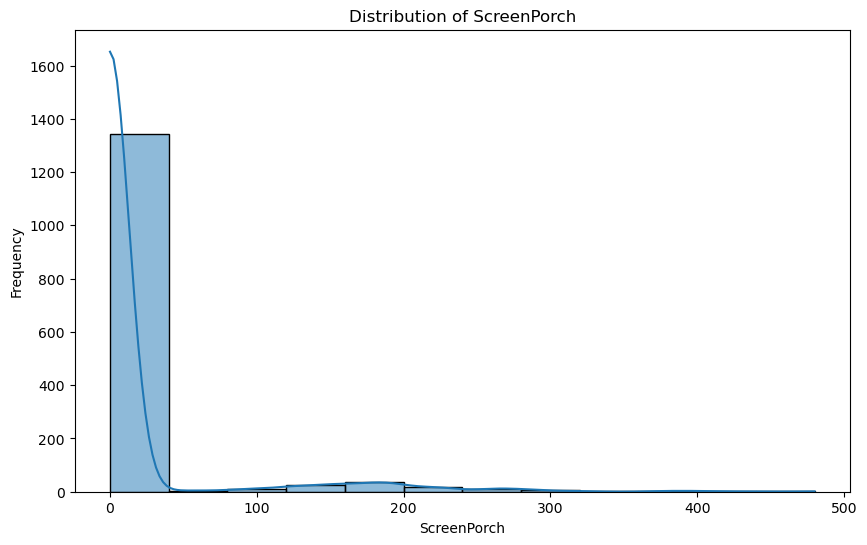

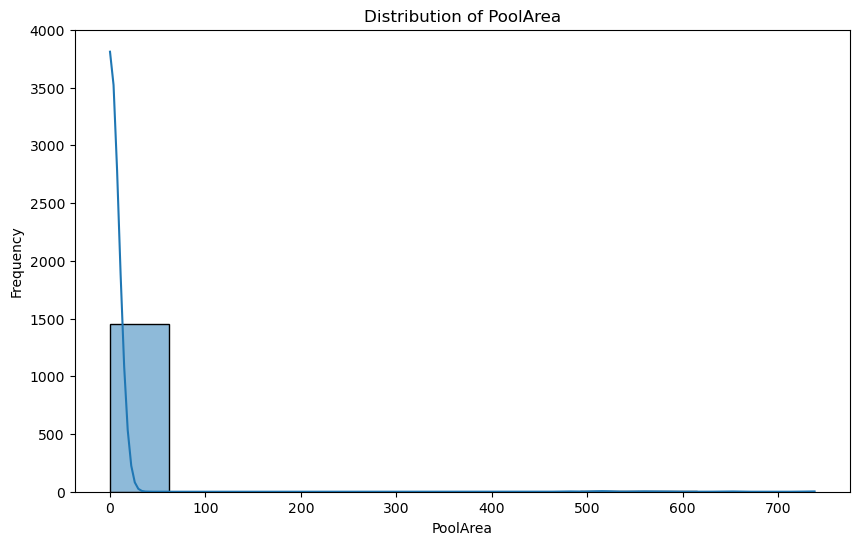

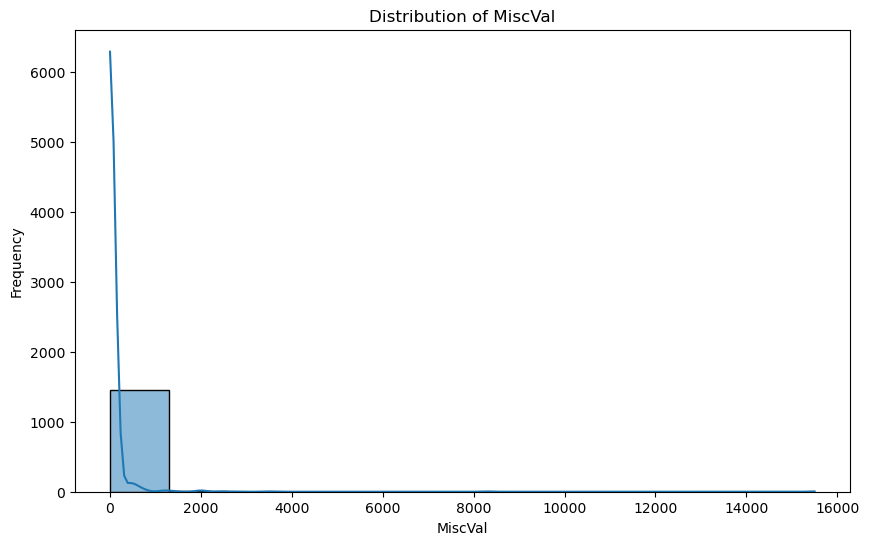

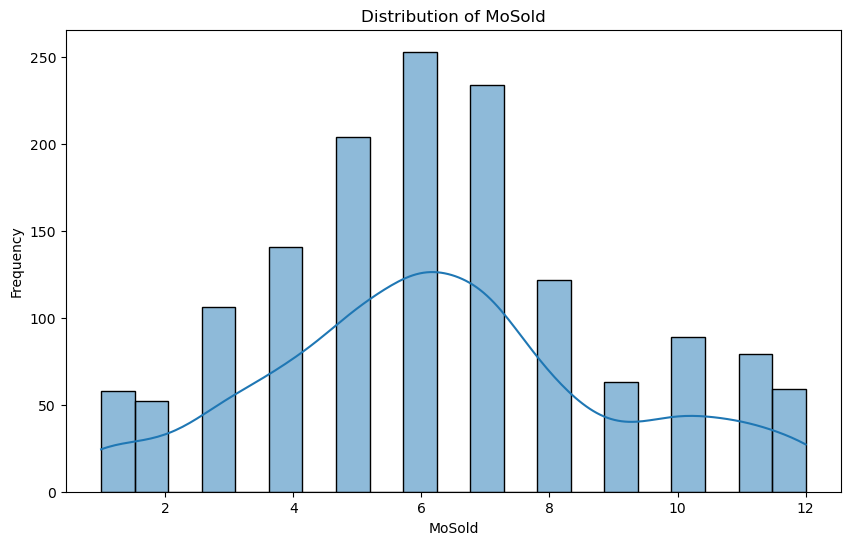

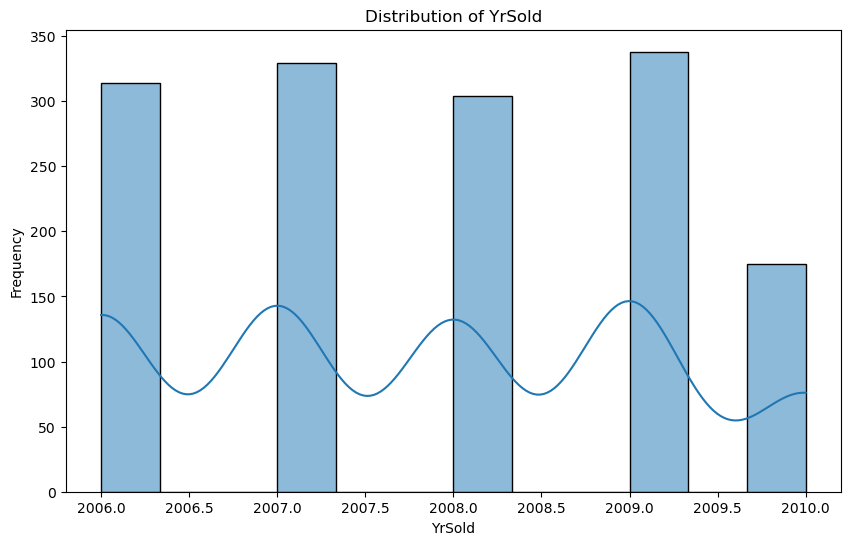

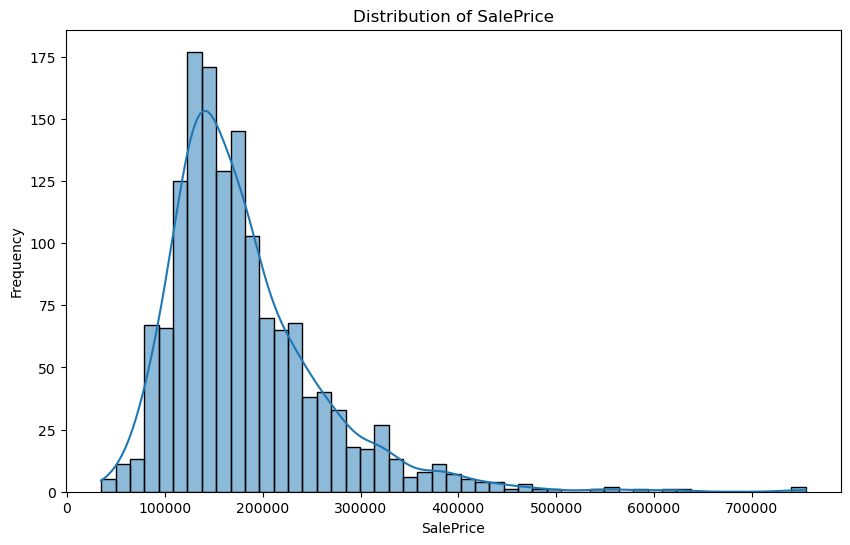

In [9]:
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns
for var in numeric_vars:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

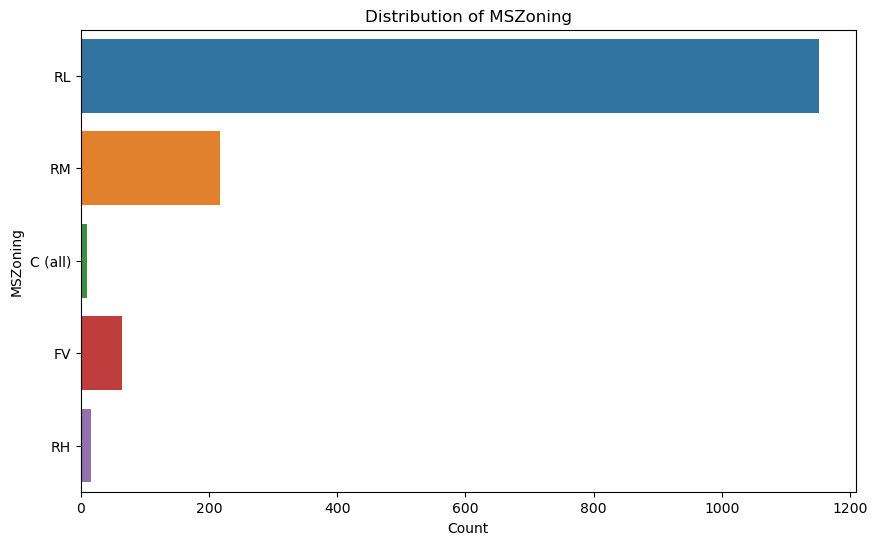

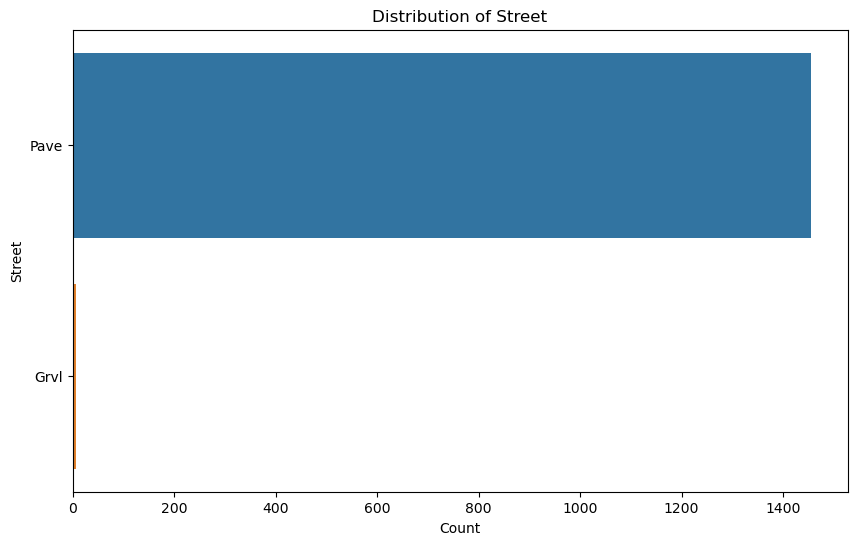

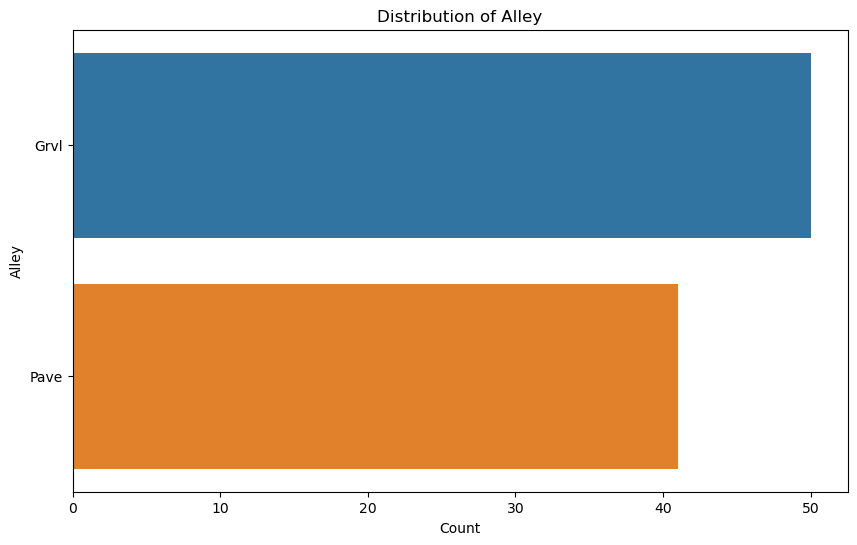

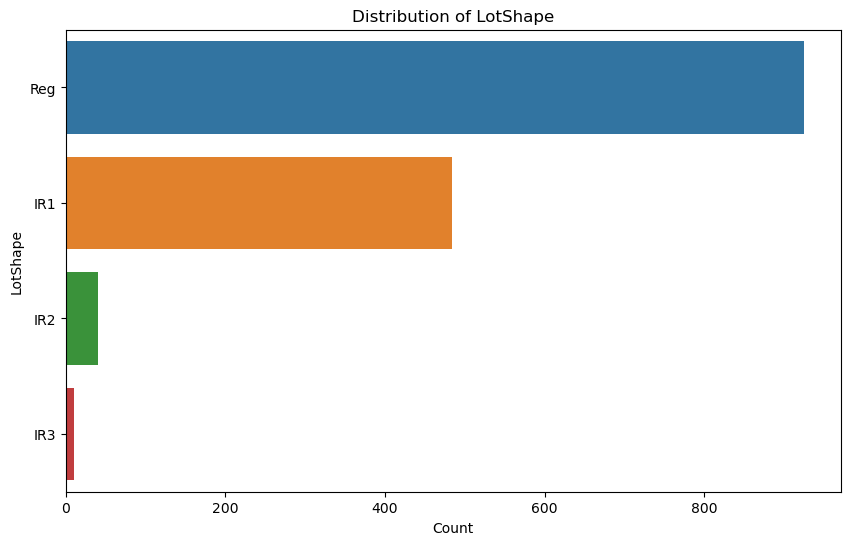

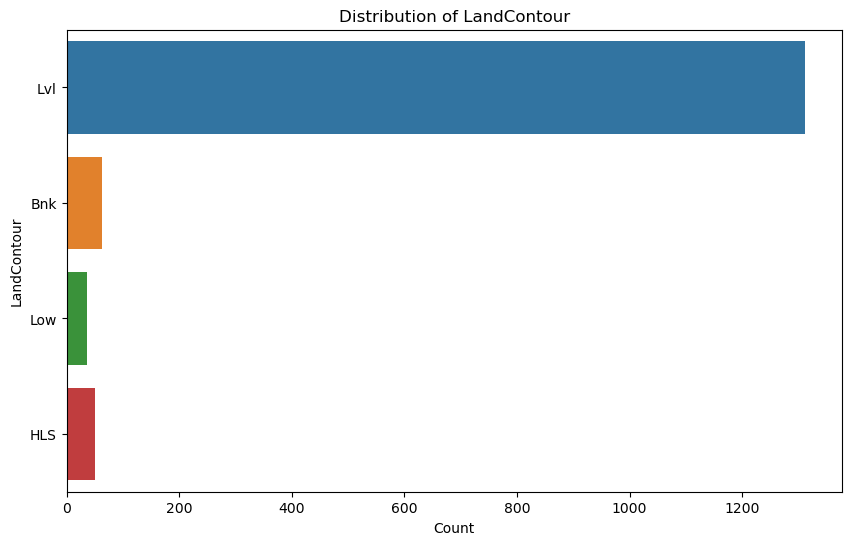

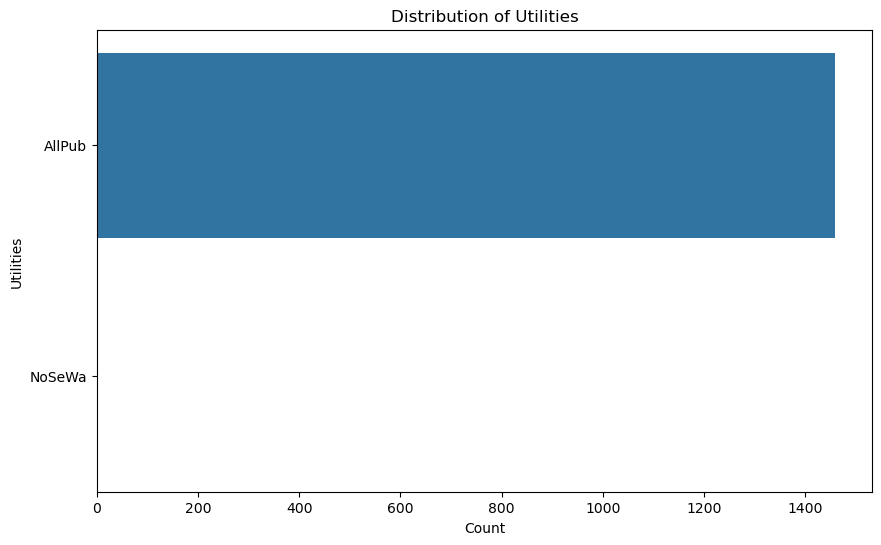

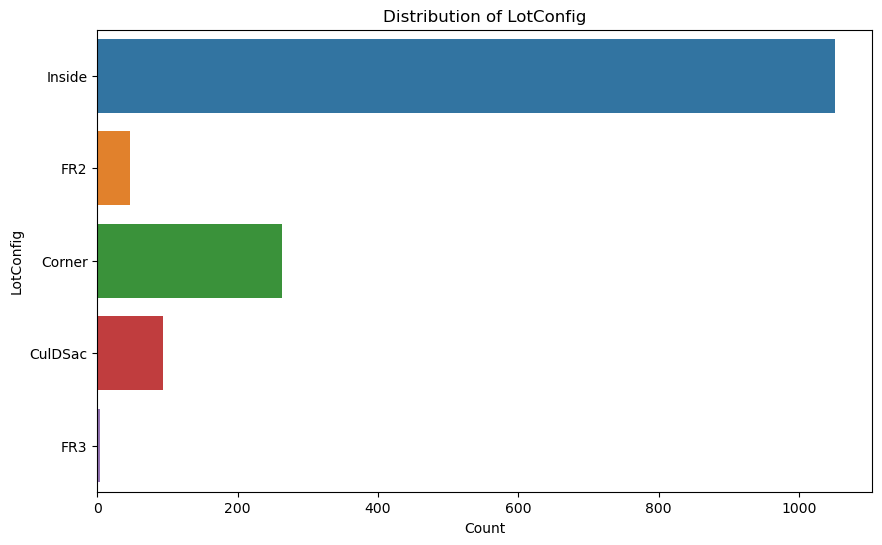

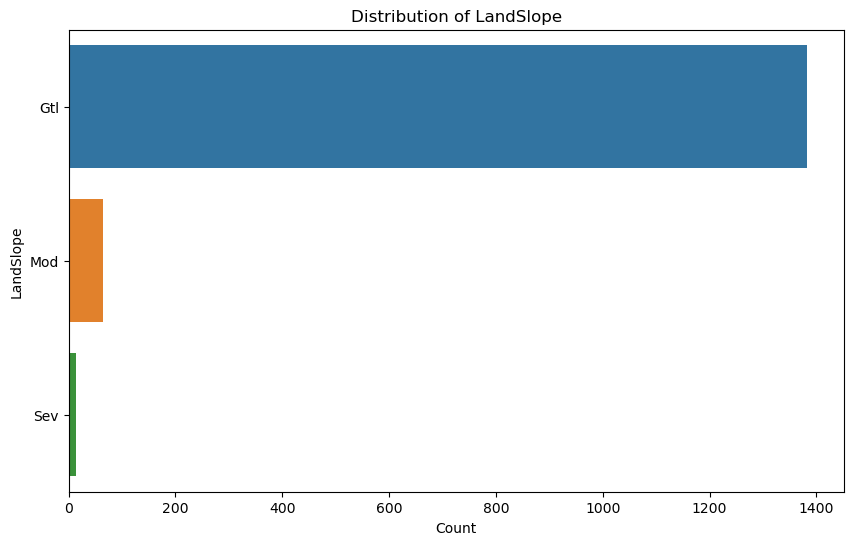

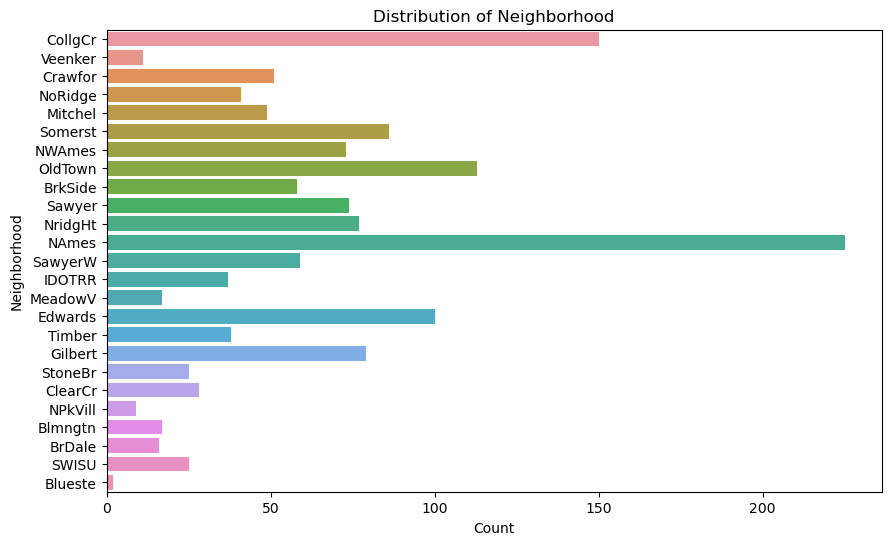

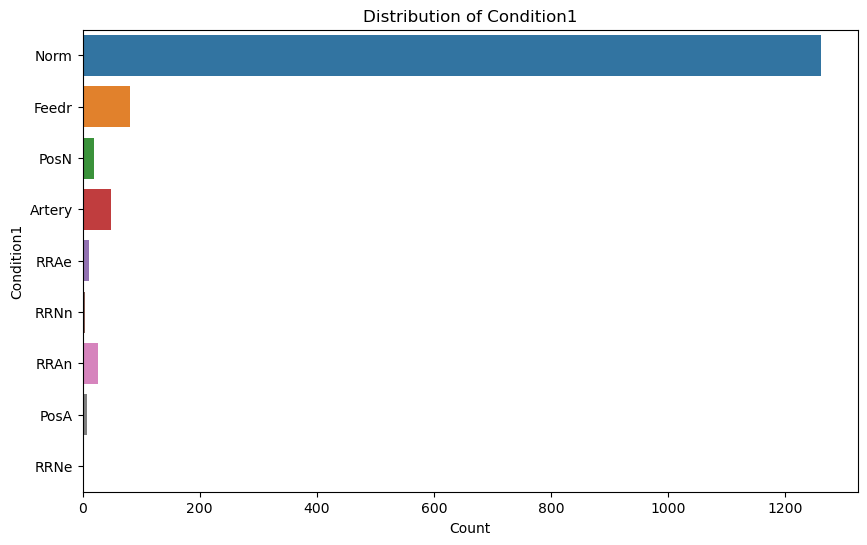

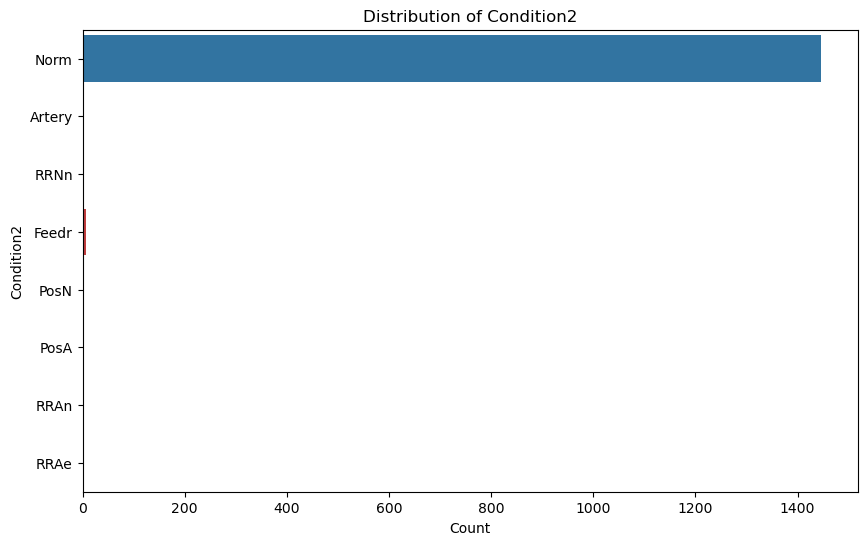

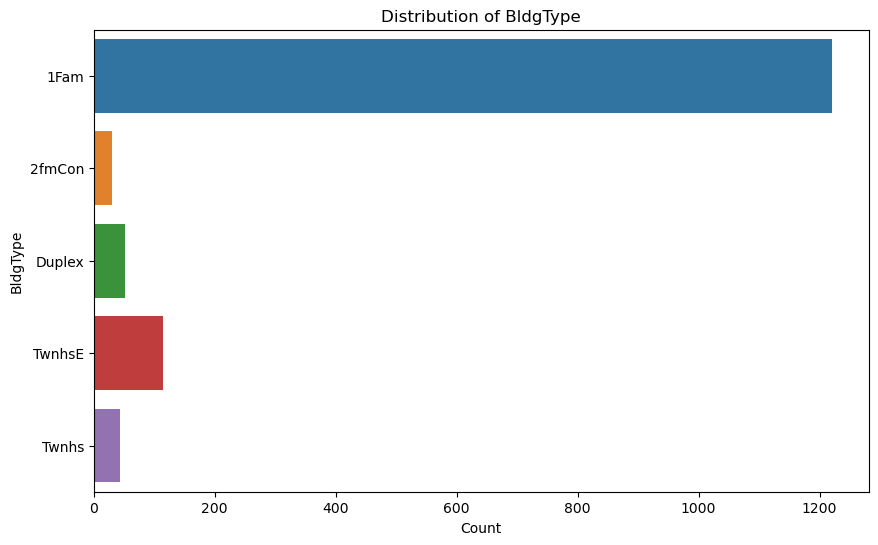

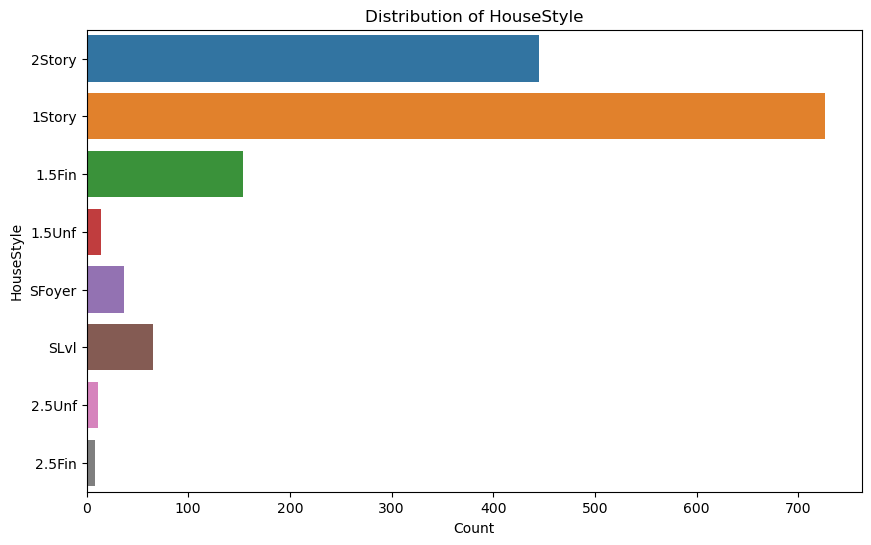

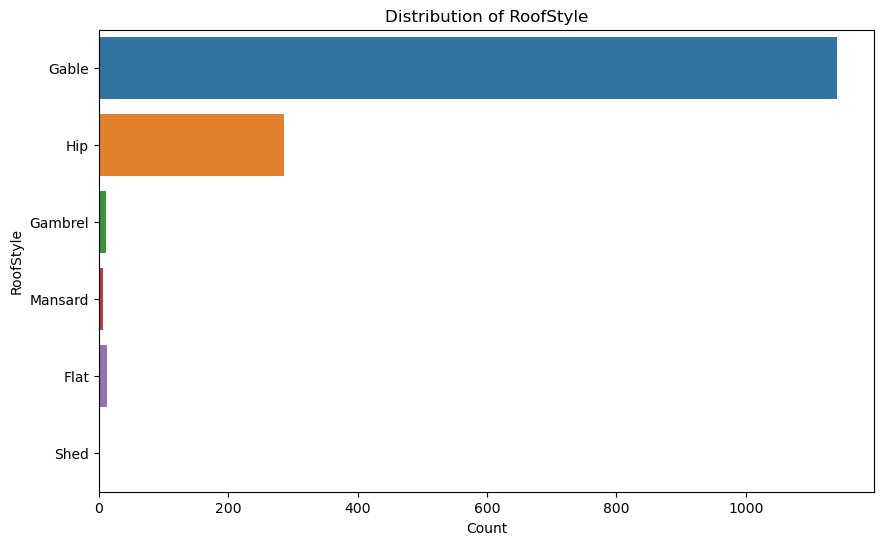

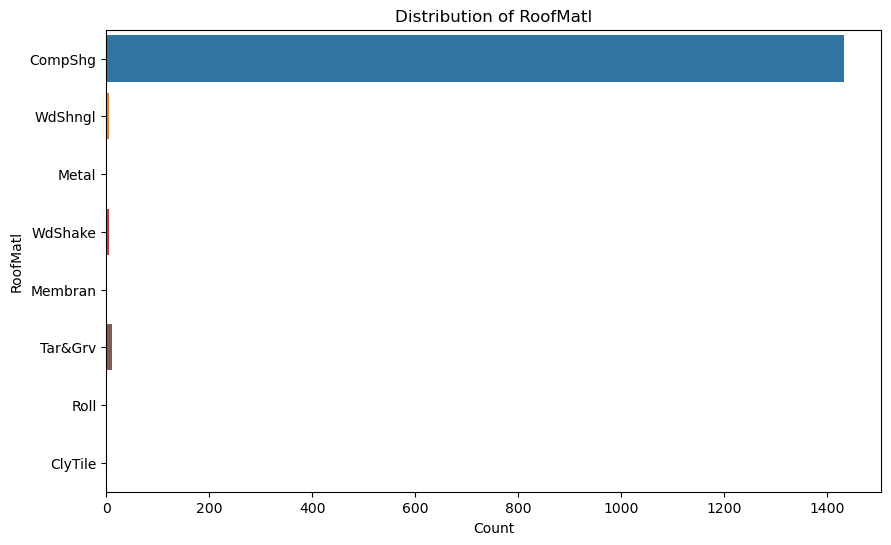

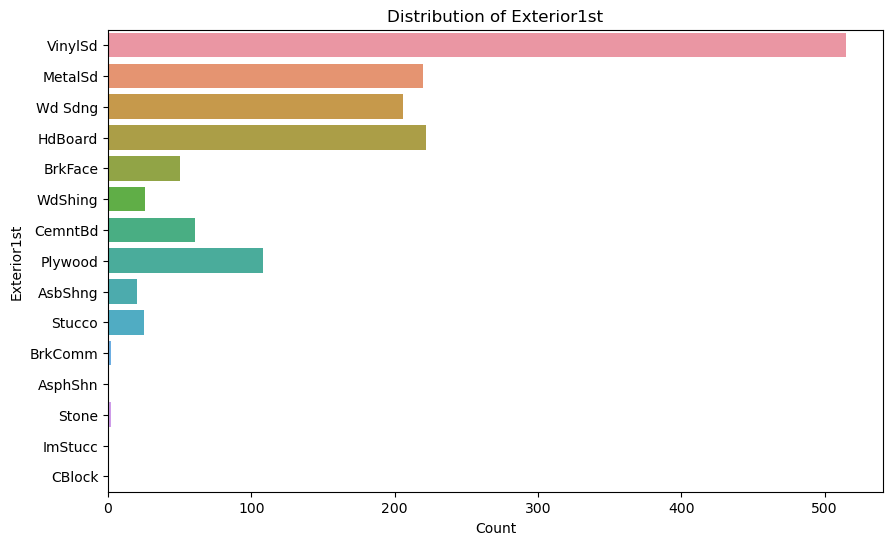

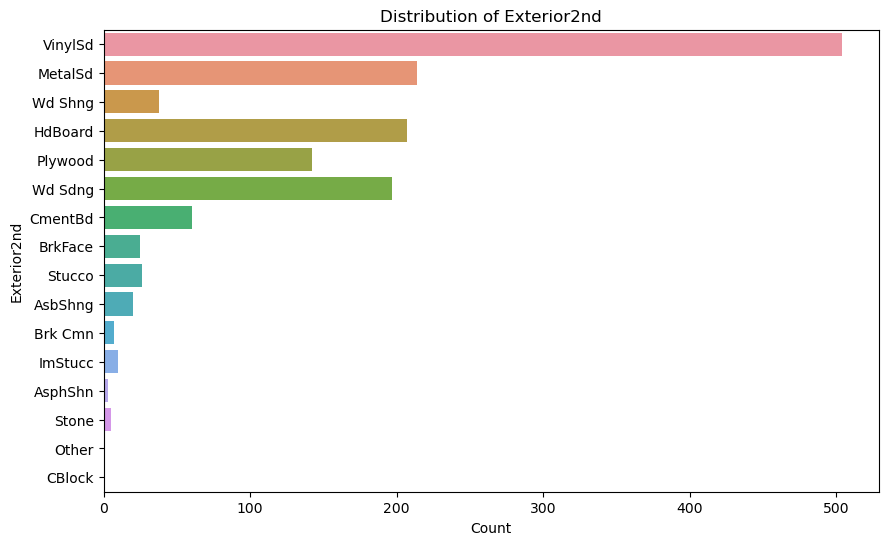

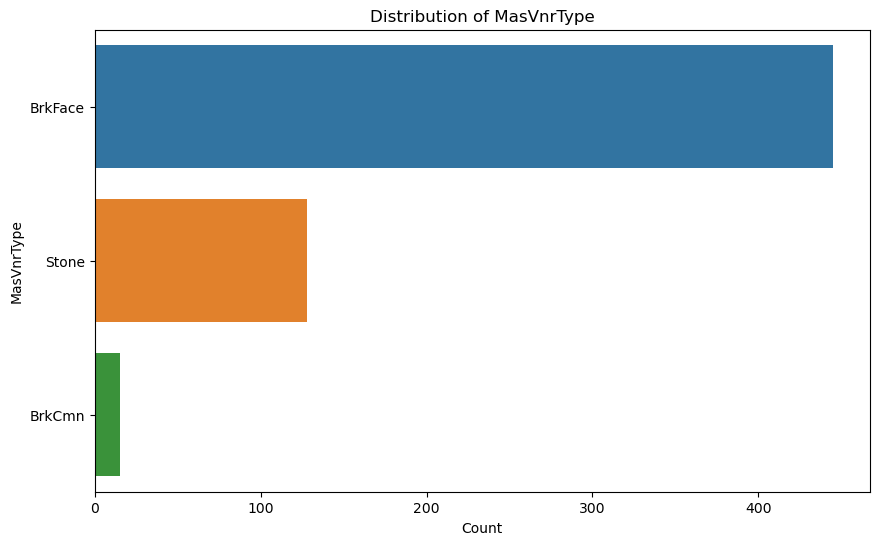

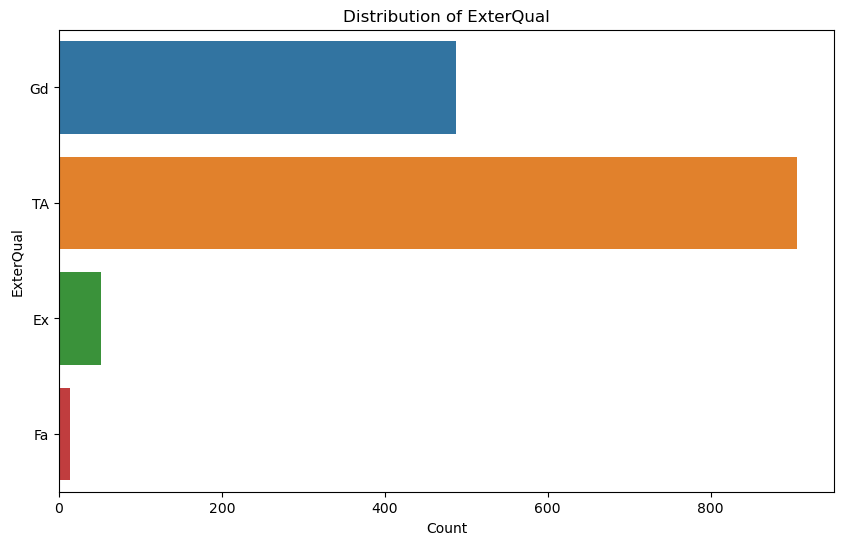

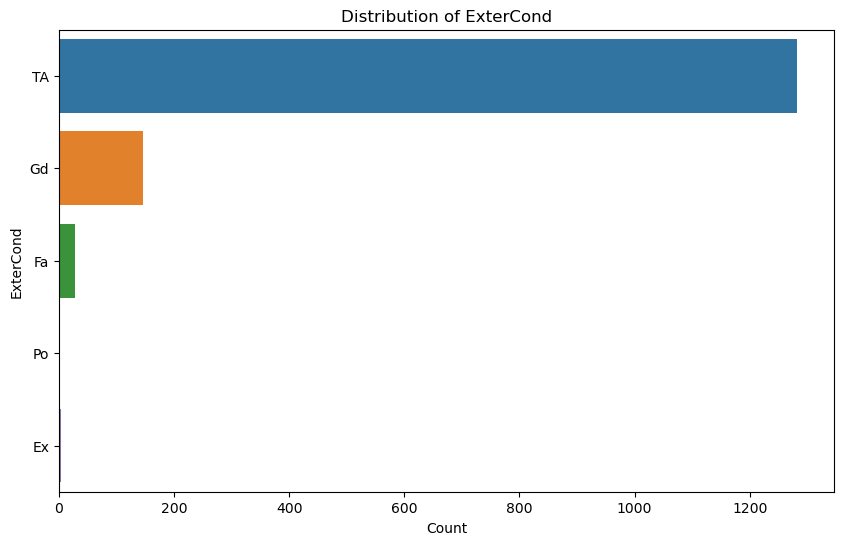

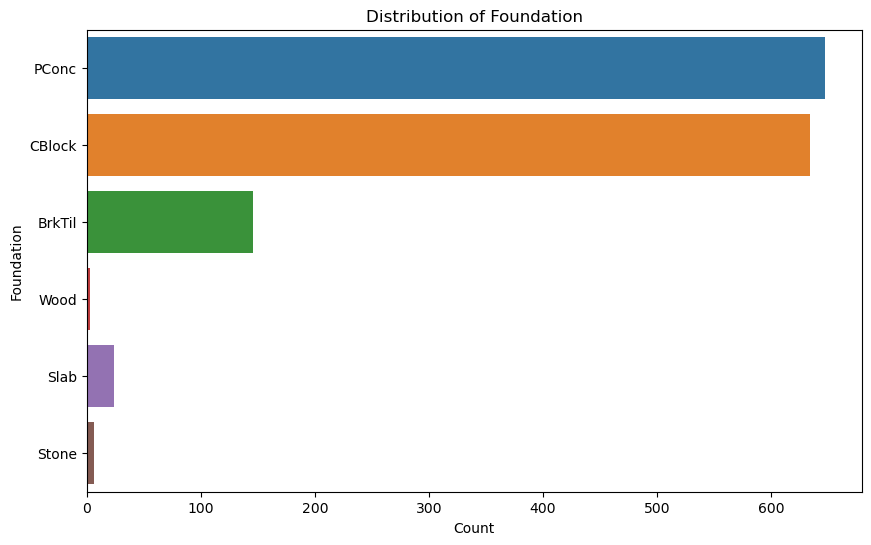

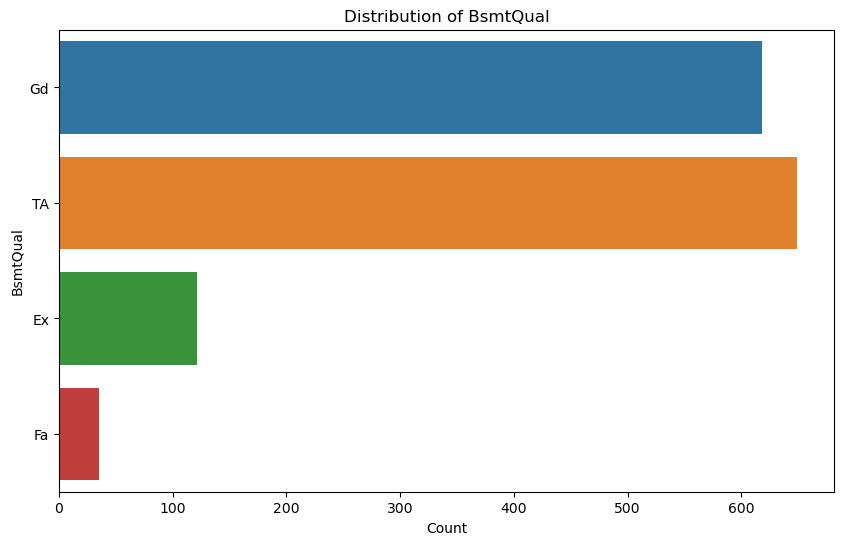

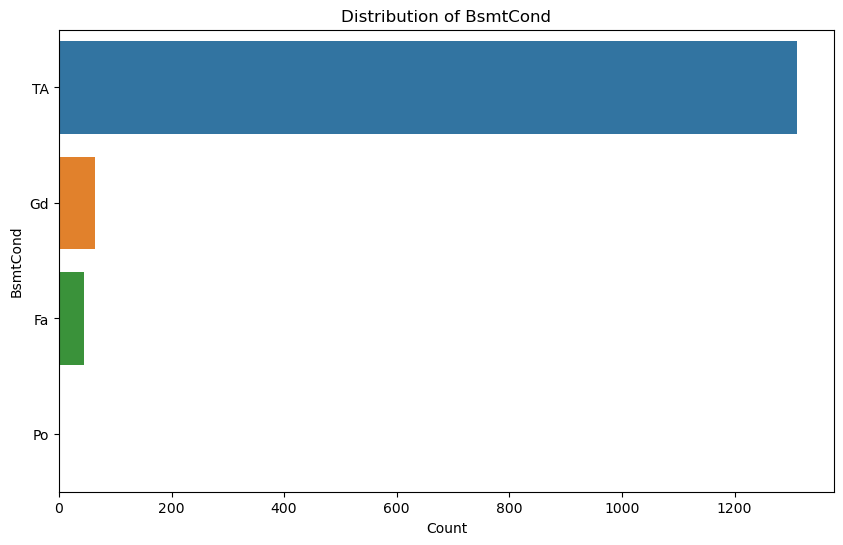

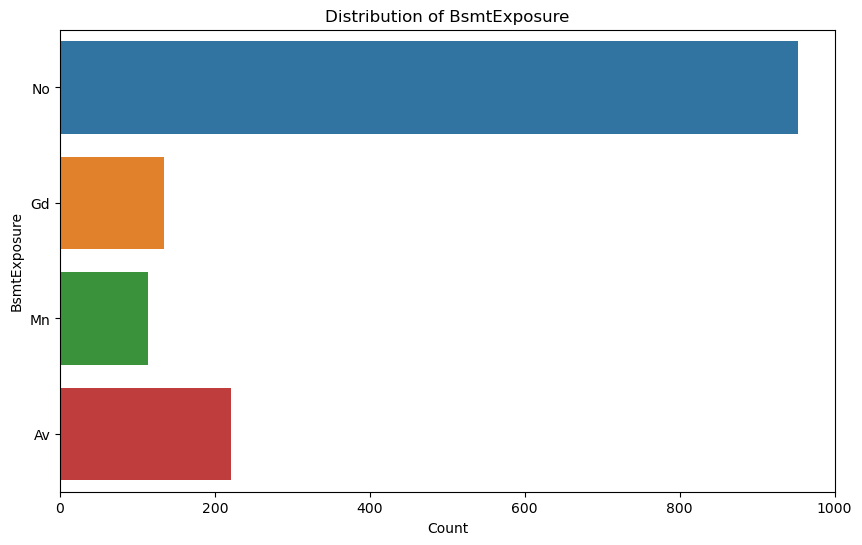

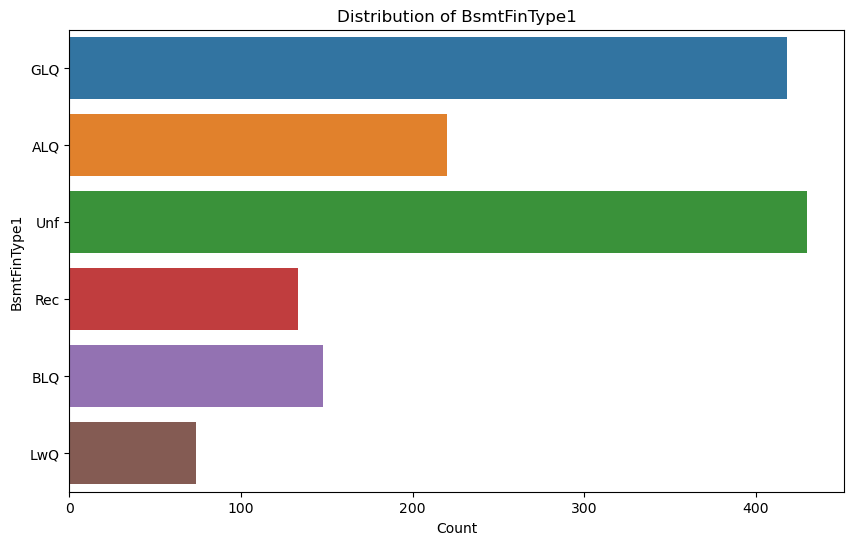

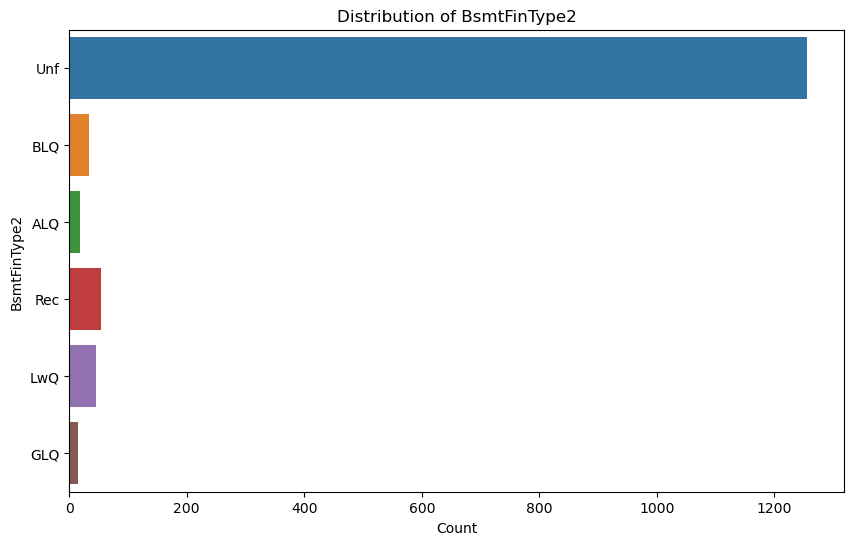

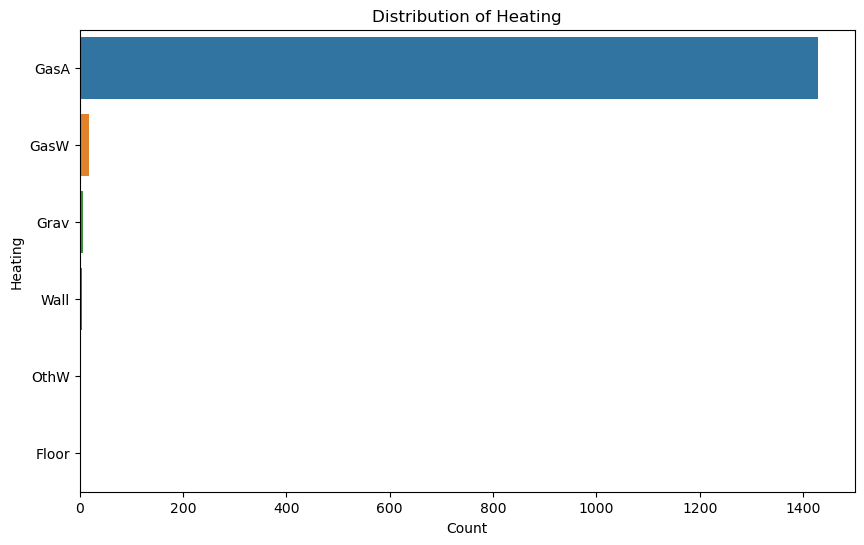

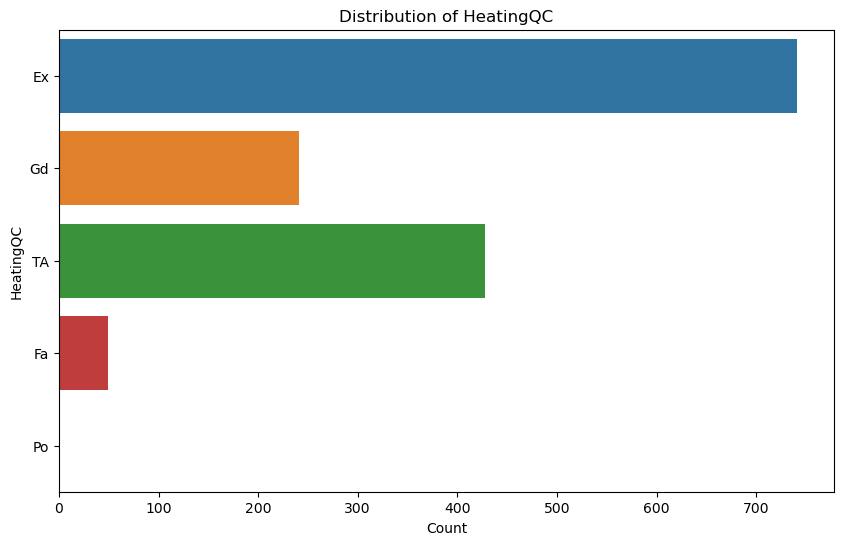

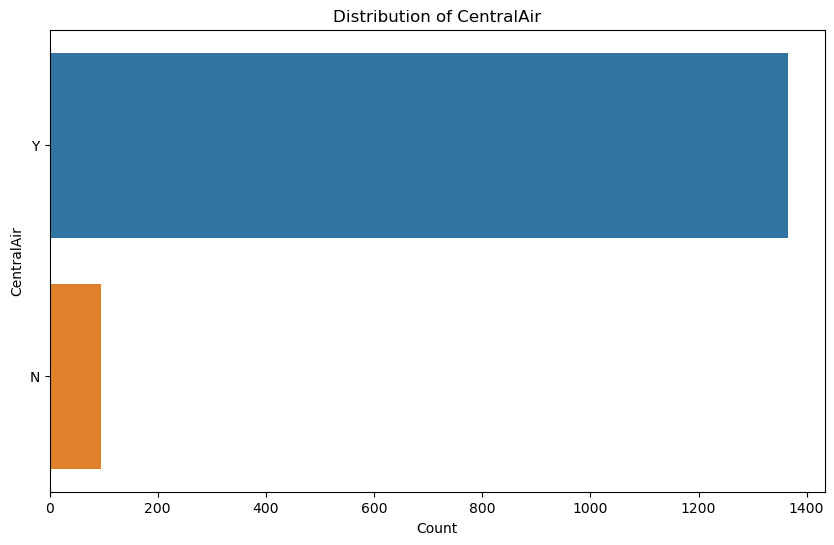

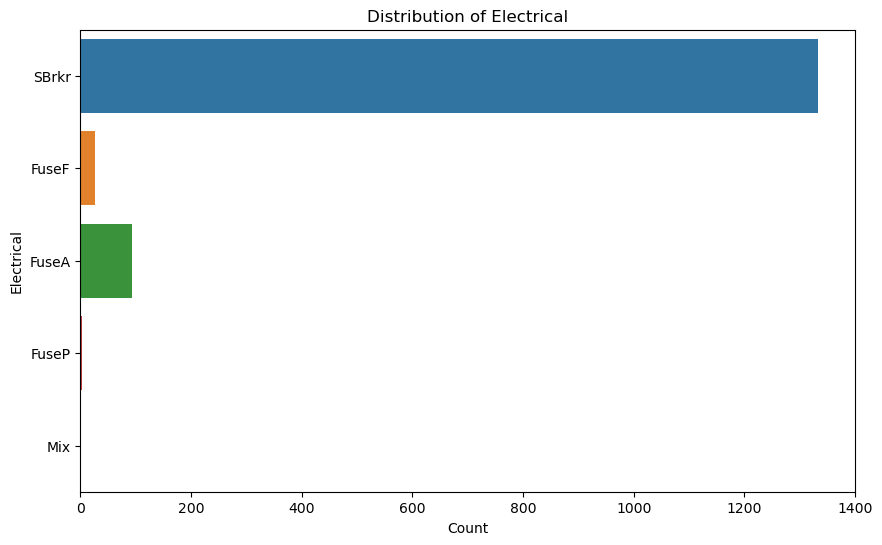

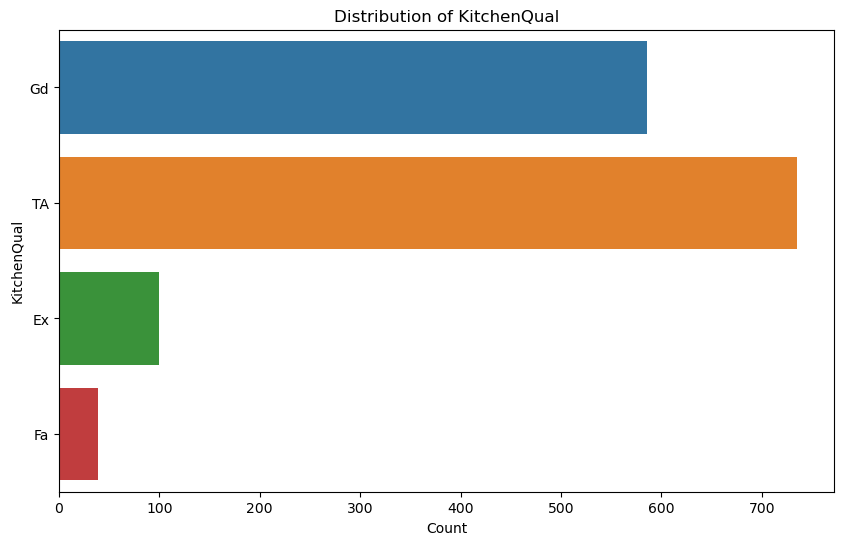

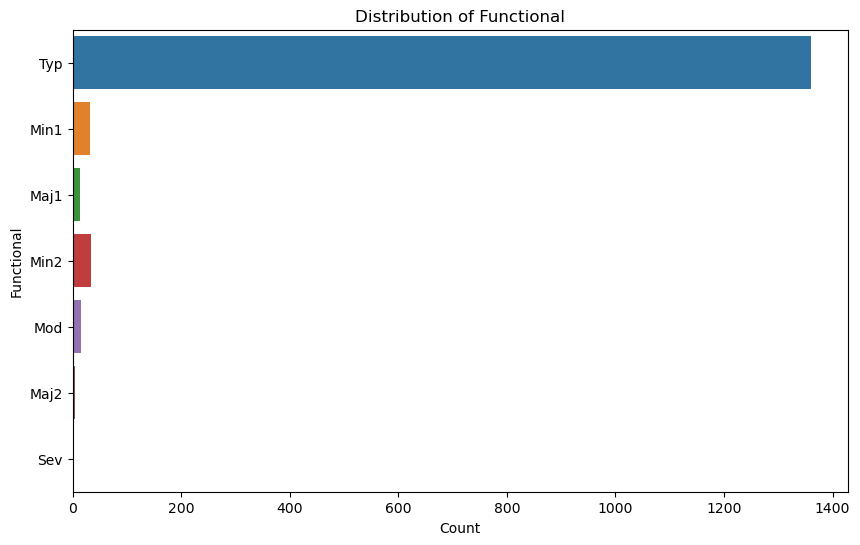

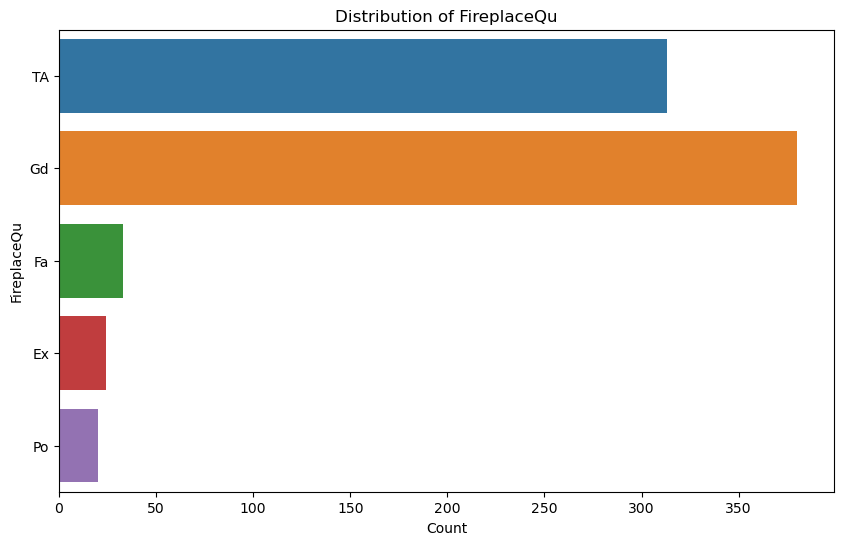

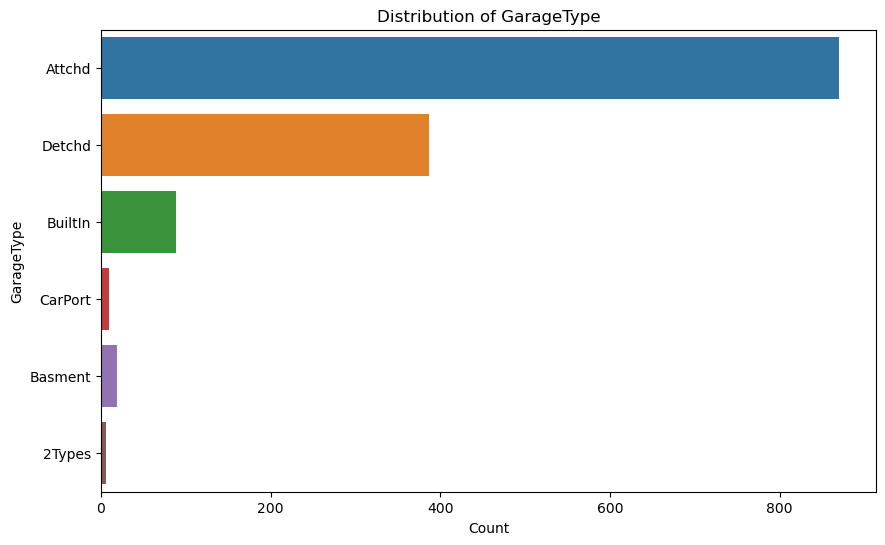

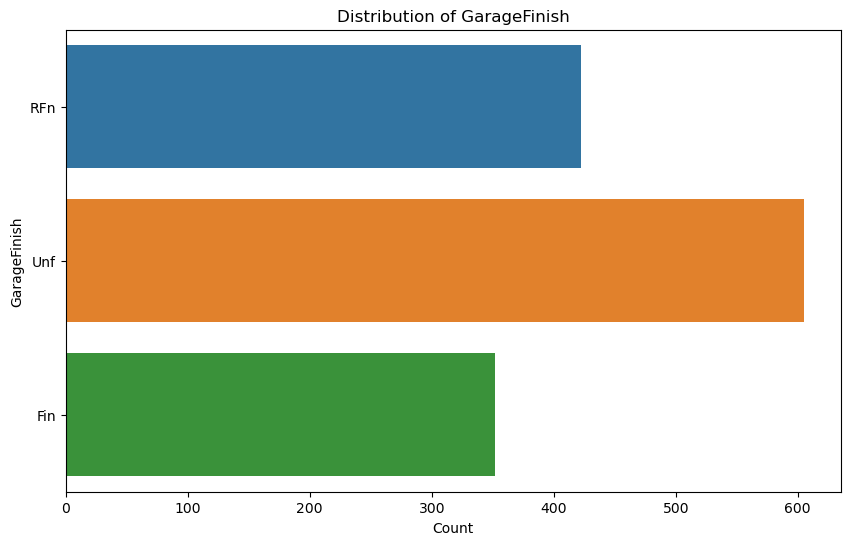

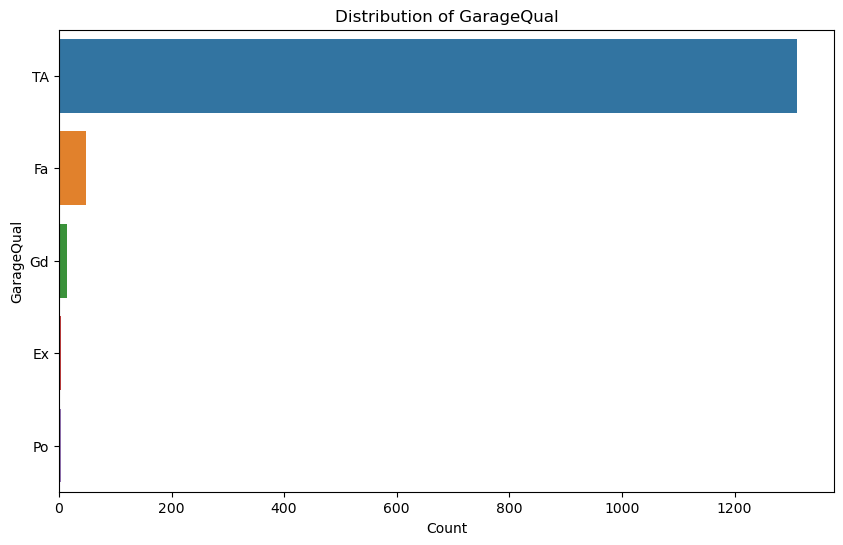

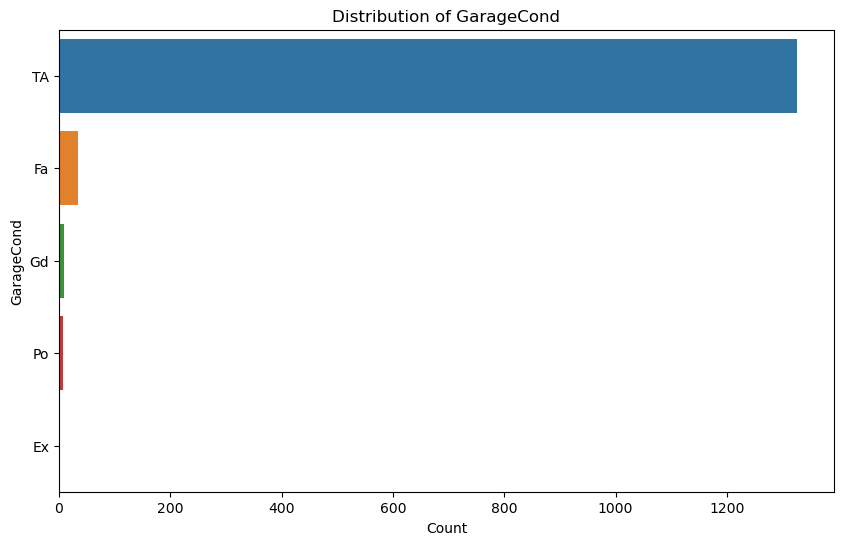

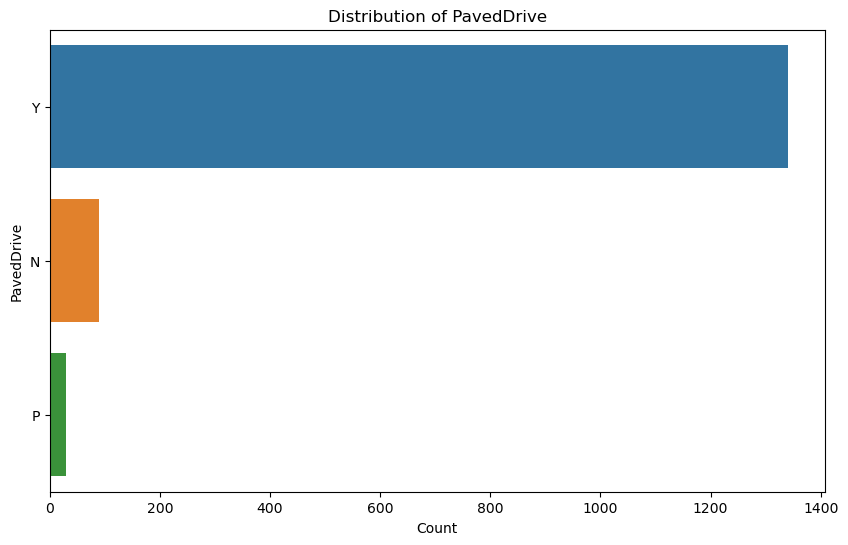

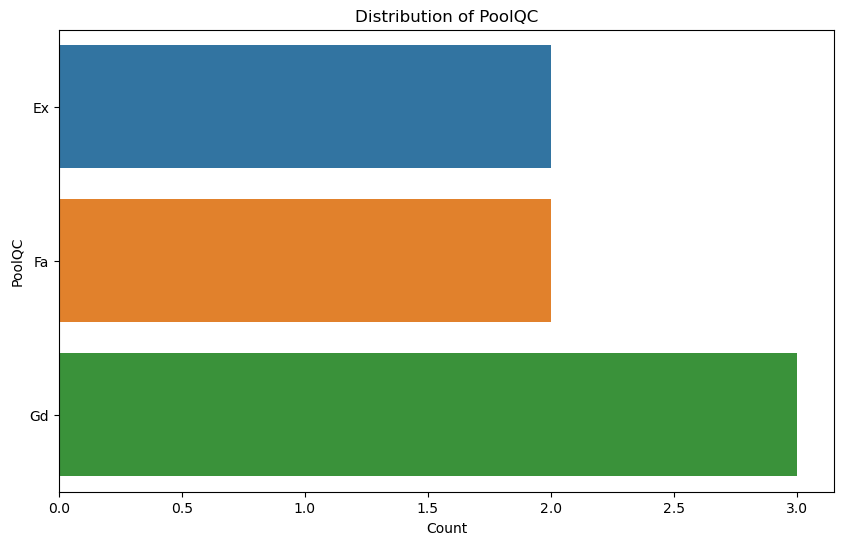

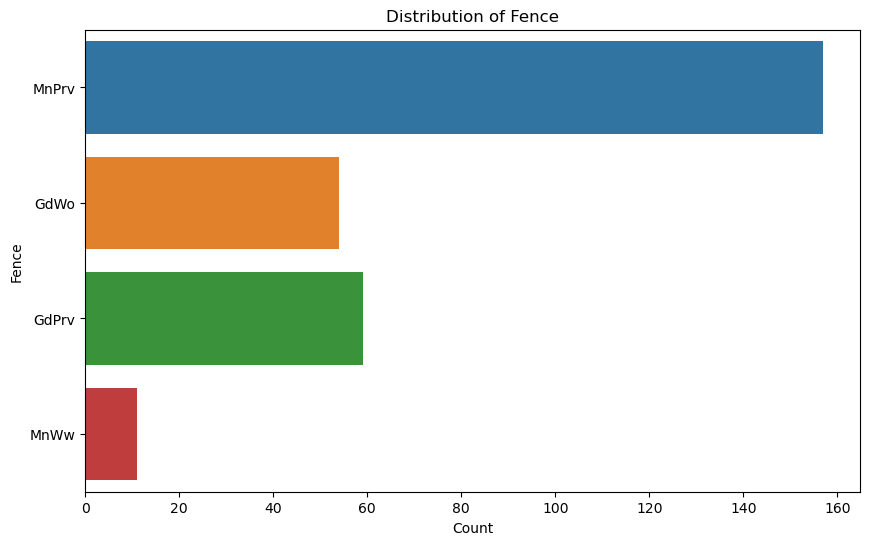

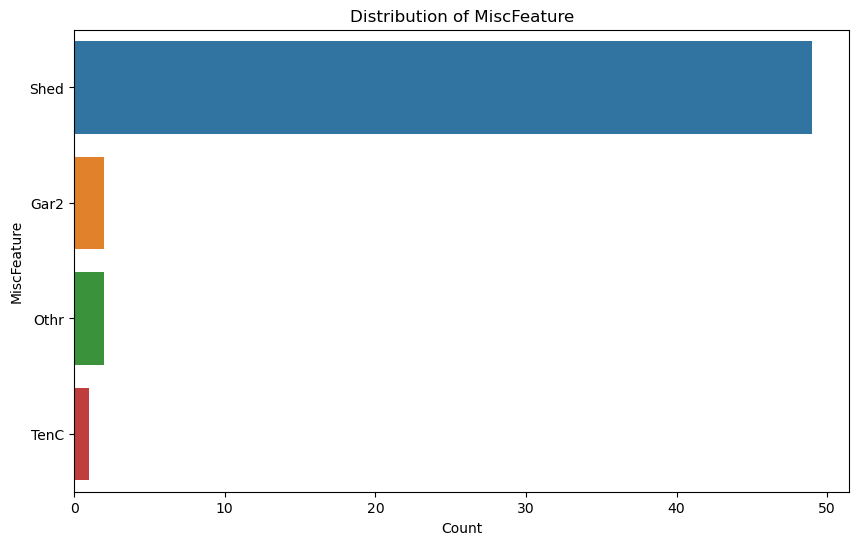

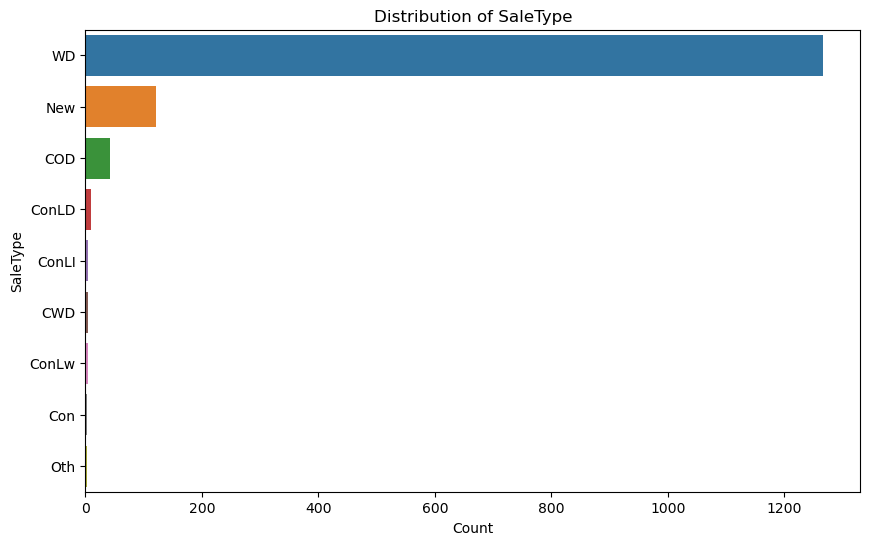

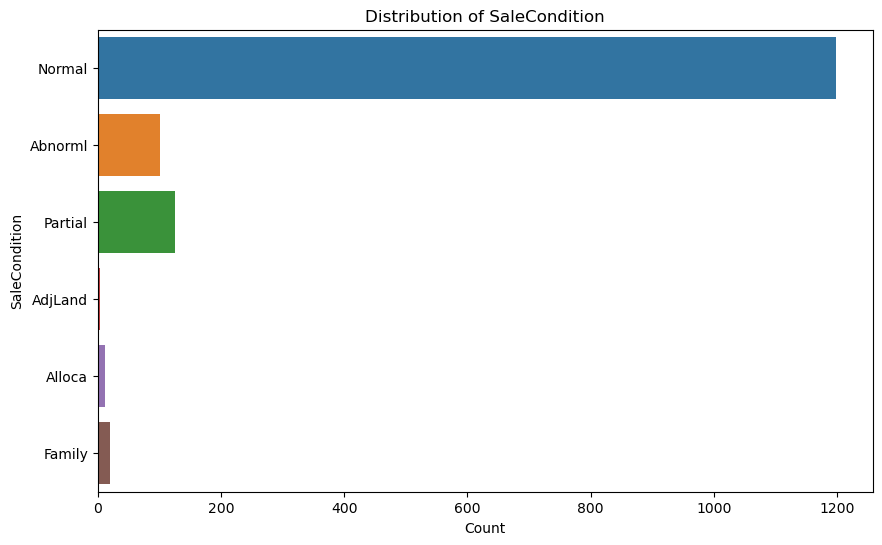

In [10]:
categorical_vars = data.select_dtypes(include=['object']).columns
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    sns.countplot(y=data[var])
    plt.title(f'Distribution of {var}')
    plt.xlabel('Count')
    plt.ylabel(var)
    plt.show()


### Outlier detection: Use the Local Outlier Factor (LoF) method to identify outliers. Refer this link for LoF method - https://dataheroes.ai/blog/outlier-detection-methods-every-data-enthusiast-must-know/

In [11]:
# Fill missing values with appropriate statistics (e.g., mean for numeric, mode for categorical)
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data['MasVnrArea'].fillna(data['MasVnrArea'].mean(), inplace=True)
data['GarageYrBlt'].fillna(data['GarageYrBlt'].mean(), inplace=True)

# For categorical variables, fill with mode
categorical_cols = data.select_dtypes(include=['object']).columns
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)


In [12]:
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns

# Applying LoF to identify outliers
lof = LocalOutlierFactor()
data['LoF'] = lof.fit_predict(data[numeric_vars])
outliers = data[data['LoF'] == -1]

print("Outliers detected using Local Outlier Factor:")
outliers

Outliers detected using Local Outlier Factor:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LoF
41,42,20,RL,115.000000,16905,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,7,2007,WD,Normal,170000,-1
53,54,20,RL,68.000000,50271,Pave,Grvl,IR1,Low,AllPub,...,Gd,MnPrv,Shed,0,11,2006,WD,Normal,385000,-1
66,67,20,RL,70.049958,19900,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,7,2010,WD,Normal,180000,-1
113,114,20,RL,70.049958,21000,Pave,Grvl,Reg,Bnk,AllPub,...,Gd,MnPrv,Shed,0,10,2007,COD,Abnorml,217000,-1
120,121,80,RL,70.049958,21453,Pave,Grvl,IR1,Low,AllPub,...,Gd,MnPrv,Shed,0,10,2006,WD,Normal,180000,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1409,1410,60,RL,46.000000,20544,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,11,2008,WD,Normal,215000,-1
1430,1431,60,RL,60.000000,21930,Pave,Grvl,IR3,Lvl,AllPub,...,Gd,MnPrv,Shed,0,7,2006,WD,Normal,192140,-1
1434,1435,20,RL,80.000000,17400,Pave,Grvl,Reg,Low,AllPub,...,Gd,MnPrv,Shed,0,5,2006,WD,Normal,160000,-1
1446,1447,20,RL,70.049958,26142,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,4,2010,WD,Normal,157900,-1


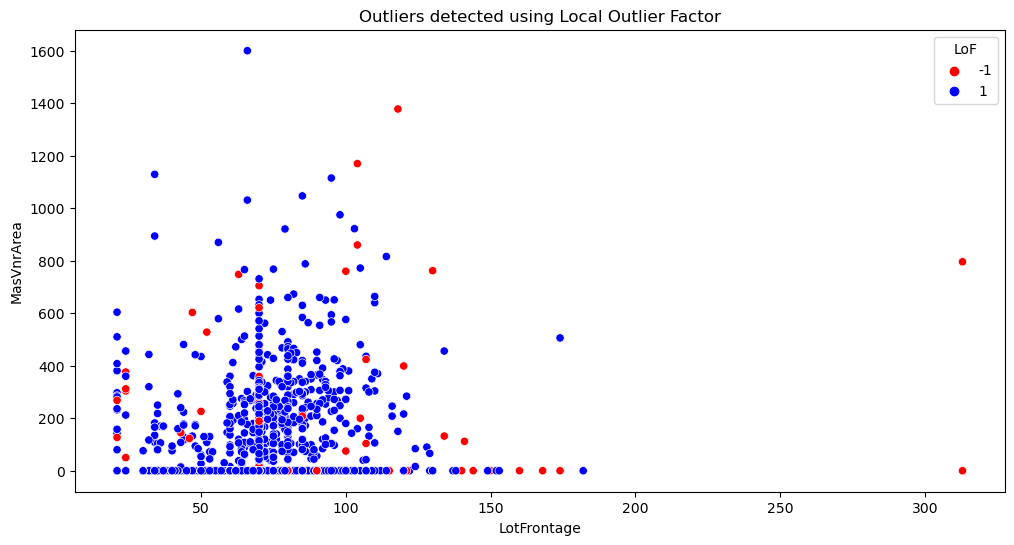

In [13]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='LotFrontage', y='MasVnrArea', data=data, hue='LoF', palette={1: 'blue', -1: 'red'})
plt.title('Outliers detected using Local Outlier Factor')
plt.xlabel('LotFrontage')
plt.ylabel('MasVnrArea')
plt.legend(title='LoF', loc='upper right')
plt.show()

### Bivariate analysis: Perform at least one analysis for each of the following hypothesis tests:

#### 	Chi-square test to assess independence between two categorical variables.


In [14]:
# Step 8: Bivariate analysis
# Chi-square test between two categorical variables
contingency_table = pd.crosstab(data['MSZoning'], data['Street'])
chi2, p, dof, ex = chi2_contingency(contingency_table)

print("\nChi-square test results:")
print(f"Chi2: {chi2}, p-value: {p}")



Chi-square test results:
Chi2: 94.74158356813642, p-value: 1.293331100878627e-19


#### Correlation analysis to examine relationships between two numeric variables.


Correlation analysis results:
Correlation: 0.2638433538714057, p-value: 1.1231391549186638e-24


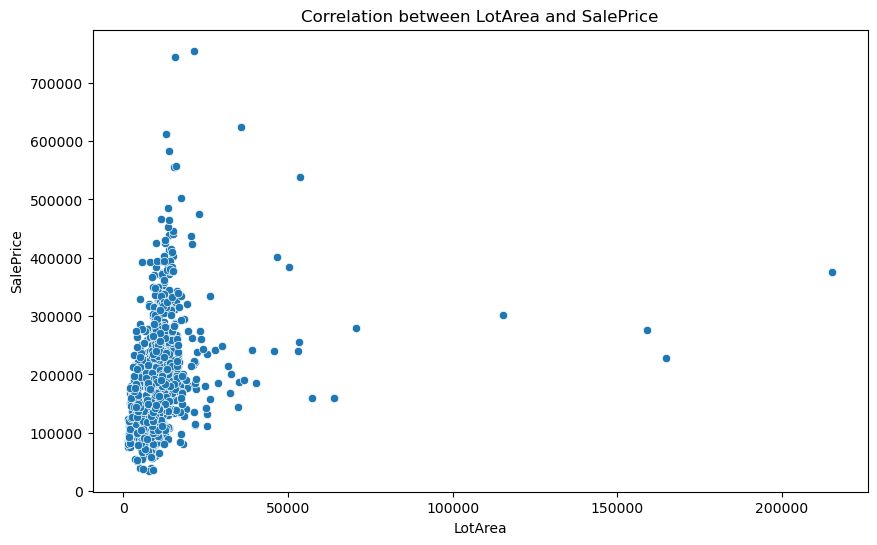

In [15]:
# Correlation analysis between two numeric variables
corr, p_value = pearsonr(data['LotArea'], data['SalePrice'])

print("\nCorrelation analysis results:")
print(f"Correlation: {corr}, p-value: {p_value}")

# Visualizing correlation
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['LotArea'], y=data['SalePrice'])
plt.title('Correlation between LotArea and SalePrice')
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.show()

#### Check for presence of collinearity and multi-collinearity and address it appropriately.

In [16]:
data.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [17]:
# Ensure 'LoF' Column Exists
if 'LoF' not in data.columns:
    data['LoF'] = LocalOutlierFactor().fit_predict(data.select_dtypes(include=[np.number]))

# Check for presence of collinearity and multi-collinearity
# Using Variance Inflation Factor (VIF) to check for multicollinearity
numeric_vars = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_vars.remove('Id')
numeric_vars.remove('SalePrice')
if 'LoF' in numeric_vars:
    numeric_vars.remove('LoF')

X_vif = data[numeric_vars]

# Add a constant column for statsmodels
X_vif = sm.add_constant(X_vif)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["Variable"] = X_vif.columns
vif["VIF"] = [1 / (1 - sm.OLS(X_vif[col], X_vif.drop(columns=[col])).fit().rsquared) for col in X_vif.columns]

print("\nVariance Inflation Factor (VIF):")
print(vif)

# Dropping variables with high VIF if needed
# Here we assume a threshold VIF > 10 indicates multicollinearity
high_vif_vars = vif[vif["VIF"] > 10]["Variable"].tolist()
if 'const' in high_vif_vars:
    high_vif_vars.remove('const')  # We do not drop the constant term

X_vif = X_vif.drop(columns=high_vif_vars)


Variance Inflation Factor (VIF):
         Variable           VIF
0           const  2.416363e+06
1      MSSubClass  1.655804e+00
2     LotFrontage  1.571264e+00
3         LotArea  1.255330e+00
4     OverallQual  3.259876e+00
5     OverallCond  1.594863e+00
6       YearBuilt  5.029276e+00
7    YearRemodAdd  2.422605e+00
8      MasVnrArea  1.394594e+00
9      BsmtFinSF1           inf
10     BsmtFinSF2           inf
11      BsmtUnfSF           inf
12    TotalBsmtSF           inf
13       1stFlrSF           inf
14       2ndFlrSF           inf
15   LowQualFinSF           inf
16      GrLivArea           inf
17   BsmtFullBath  2.219414e+00
18   BsmtHalfBath  1.152990e+00
19       FullBath  2.950886e+00
20       HalfBath  2.167329e+00
21   BedroomAbvGr  2.328926e+00
22   KitchenAbvGr  1.593444e+00
23   TotRmsAbvGrd  4.885027e+00
24     Fireplaces  1.585403e+00
25    GarageYrBlt  3.367992e+00
26     GarageCars  5.576859e+00
27     GarageArea  5.468439e+00
28     WoodDeckSF  1.218662e+00
29    

In [18]:
data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LoF
0,1,60,RL,65.0,8450,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,Grvl,IR1,Lvl,AllPub,...,Gd,MnPrv,Shed,0,12,2008,WD,Normal,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,8,2007,WD,Normal,175000,1
1456,1457,20,RL,85.0,13175,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,2,2010,WD,Normal,210000,1
1457,1458,70,RL,66.0,9042,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,GdPrv,Shed,2500,5,2010,WD,Normal,266500,1
1458,1459,20,RL,68.0,9717,Pave,Grvl,Reg,Lvl,AllPub,...,Gd,MnPrv,Shed,0,4,2010,WD,Normal,142125,1


### Encode the data if required (if there are categorical independent variables).

In [19]:
from sklearn.preprocessing import LabelEncoder

def label_encode_categorical_columns(df):

    label_encoders = {}
    categorical_cols = df.select_dtypes(include=['object']).columns

    for col in categorical_cols:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])
        label_encoders[col] = le
    
    return df, label_encoders

# Usage
# Assuming 'data' is your DataFrame
data, label_encoders = label_encode_categorical_columns(data)

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LoF
0,1,60,3,65.0,8450,1,0,3,3,0,...,2,2,2,0,2,2008,8,4,208500,1
1,2,20,3,80.0,9600,1,0,3,3,0,...,2,2,2,0,5,2007,8,4,181500,1
2,3,60,3,68.0,11250,1,0,0,3,0,...,2,2,2,0,9,2008,8,4,223500,1
3,4,70,3,60.0,9550,1,0,0,3,0,...,2,2,2,0,2,2006,8,0,140000,1
4,5,60,3,84.0,14260,1,0,0,3,0,...,2,2,2,0,12,2008,8,4,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,2,2,2,0,8,2007,8,4,175000,1
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,2,2,2,0,2,2010,8,4,210000,1
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,2,0,2,2500,5,2010,8,4,266500,1
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,2,2,2,0,4,2010,8,4,142125,1


In [20]:
# Step 10: Encode the data if required (if there are categorical independent variables)
categorical_features = data.select_dtypes(include=['object']).columns.tolist()
numeric_features = X_vif.columns.tolist()
if 'const' in numeric_features:
    numeric_features.remove('const')

# Create a preprocessor for scaling numeric features and encoding categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ])

data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LoF
0,1,60,3,65.0,8450,1,0,3,3,0,...,2,2,2,0,2,2008,8,4,208500,1
1,2,20,3,80.0,9600,1,0,3,3,0,...,2,2,2,0,5,2007,8,4,181500,1
2,3,60,3,68.0,11250,1,0,0,3,0,...,2,2,2,0,9,2008,8,4,223500,1
3,4,70,3,60.0,9550,1,0,0,3,0,...,2,2,2,0,2,2006,8,0,140000,1
4,5,60,3,84.0,14260,1,0,0,3,0,...,2,2,2,0,12,2008,8,4,250000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,0,3,3,0,...,2,2,2,0,8,2007,8,4,175000,1
1456,1457,20,3,85.0,13175,1,0,3,3,0,...,2,2,2,0,2,2010,8,4,210000,1
1457,1458,70,3,66.0,9042,1,0,3,3,0,...,2,0,2,2500,5,2010,8,4,266500,1
1458,1459,20,3,68.0,9717,1,0,3,3,0,...,2,2,2,0,4,2010,8,4,142125,1


### Split the dataset into training and testing subsets.

In [21]:
# Step 11: Split the dataset into training and testing subsets
X = data.drop(columns=['Id', 'SalePrice', 'LoF'])  # Features
y = data['SalePrice'] # Target
X

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,3,65.0,8450,1,0,3,3,0,4,...,0,0,2,2,2,0,2,2008,8,4
1,20,3,80.0,9600,1,0,3,3,0,2,...,0,0,2,2,2,0,5,2007,8,4
2,60,3,68.0,11250,1,0,0,3,0,4,...,0,0,2,2,2,0,9,2008,8,4
3,70,3,60.0,9550,1,0,0,3,0,0,...,0,0,2,2,2,0,2,2006,8,0
4,60,3,84.0,14260,1,0,0,3,0,2,...,0,0,2,2,2,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,0,3,3,0,4,...,0,0,2,2,2,0,8,2007,8,4
1456,20,3,85.0,13175,1,0,3,3,0,4,...,0,0,2,2,2,0,2,2010,8,4
1457,70,3,66.0,9042,1,0,3,3,0,4,...,0,0,2,0,2,2500,5,2010,8,4
1458,20,3,68.0,9717,1,0,3,3,0,4,...,0,0,2,2,2,0,4,2010,8,4


In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure 'const' is not in the training and testing data
if 'const' in X_train.columns:
    X_train = X_train.drop(columns=['const'])
if 'const' in X_test.columns:
    X_test = X_test.drop(columns=['const'])


### Scale the training data and use the same scaler to also scale the test data. (use scaled data for algorithms requiring scaling)

In [23]:
# Step 12: Scale the training data and use the same scaler to also scale the test data
X_train_scaled = preprocessor.fit_transform(X_train)
X_test_scaled = preprocessor.transform(X_test)


print("\nTraining and testing data prepared and scaled.")

X_train_scaled


Training and testing data prepared and scaled.


array([[-0.8667643 , -0.01288179, -0.21289571, ..., -0.09274033,
        -0.13341669,  1.65006527],
       [ 0.07410996, -0.5027726 , -0.26524463, ..., -0.09274033,
        -0.5080097 ,  0.89367742],
       [-0.63154574, -0.14648837, -0.17784146, ..., -0.09274033,
        -0.5080097 ,  0.13728958],
       ...,
       [-0.8667643 , -0.45823707, -0.23409563, ..., -0.09274033,
        -0.88260272, -1.37548612],
       [-0.16110861, -0.68091471, -0.28337613, ..., -0.09274033,
        -0.13341669, -0.61909827],
       [ 1.48542135, -0.76998577, -0.65139925, ..., -0.09274033,
        -0.13341669,  0.89367742]])

### Perform PCA. Based on outcome, recommend if Principal Components would be useful for data preparation or not. 


Explained Variance Ratios:
Principal Component 1: 0.1914
Principal Component 2: 0.0849
Principal Component 3: 0.0659
Principal Component 4: 0.0476
Principal Component 5: 0.0453
Principal Component 6: 0.0415
Principal Component 7: 0.0400
Principal Component 8: 0.0390
Principal Component 9: 0.0372
Principal Component 10: 0.0363
Principal Component 11: 0.0358
Principal Component 12: 0.0349
Principal Component 13: 0.0334
Principal Component 14: 0.0295
Principal Component 15: 0.0291
Principal Component 16: 0.0282
Principal Component 17: 0.0258
Principal Component 18: 0.0251
Principal Component 19: 0.0242
Principal Component 20: 0.0215
Principal Component 21: 0.0195
Principal Component 22: 0.0152
Principal Component 23: 0.0117
Principal Component 24: 0.0107
Principal Component 25: 0.0099
Principal Component 26: 0.0079
Principal Component 27: 0.0051
Principal Component 28: 0.0035


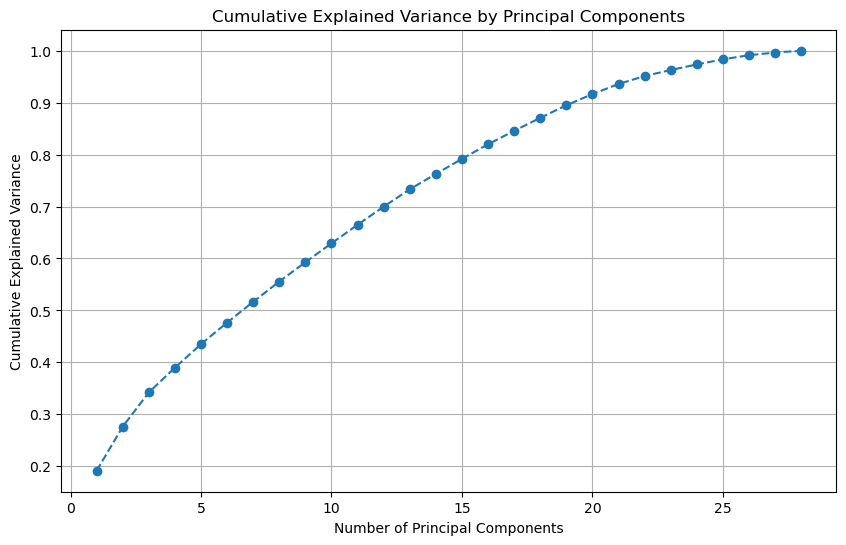

In [24]:
from sklearn.decomposition import PCA

# Step 13: Perform PCA
X_train_dense = X_train_scaled
X_test_dense = X_test_scaled

pca = PCA()
X_train_pca = pca.fit_transform(X_train_dense)
X_test_pca = pca.transform(X_test_dense)

from sklearn.decomposition import TruncatedSVD
n_components = 28
svd = TruncatedSVD(n_components=n_components)
X_train_svd = svd.fit_transform(X_train_scaled)
X_test_svd = svd.transform(X_test_scaled)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Print explained variance ratios
print("\nExplained Variance Ratios:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"Principal Component {i+1}: {ratio:.4f}")

# Plot cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()


### Regression: Build models based on atleast 3 different algorithms 

#### Linear Regression 

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_lr = lr_model.predict(X_train_scaled)
y_test_pred_lr = lr_model.predict(X_test_scaled)

# Calculate RMSE
train_rmse_lr = np.sqrt(mean_squared_error(y_train, y_train_pred_lr))
test_rmse_lr = np.sqrt(mean_squared_error(y_test, y_test_pred_lr))

# Calculate R^2 scores
train_r2_lr = r2_score(y_train, y_train_pred_lr)
test_r2_lr = r2_score(y_test, y_test_pred_lr)

print(f"\nLinear Regression:")
print(f"Training RMSE: {train_rmse_lr:.2f}")
print(f"Testing RMSE: {test_rmse_lr:.2f}")
print(f"Training R^2: {train_r2_lr:.2f}")
print(f"Testing R^2: {test_r2_lr:.2f}")



Linear Regression:
Training RMSE: 35679.74
Testing RMSE: 40124.08
Training R^2: 0.79
Testing R^2: 0.79


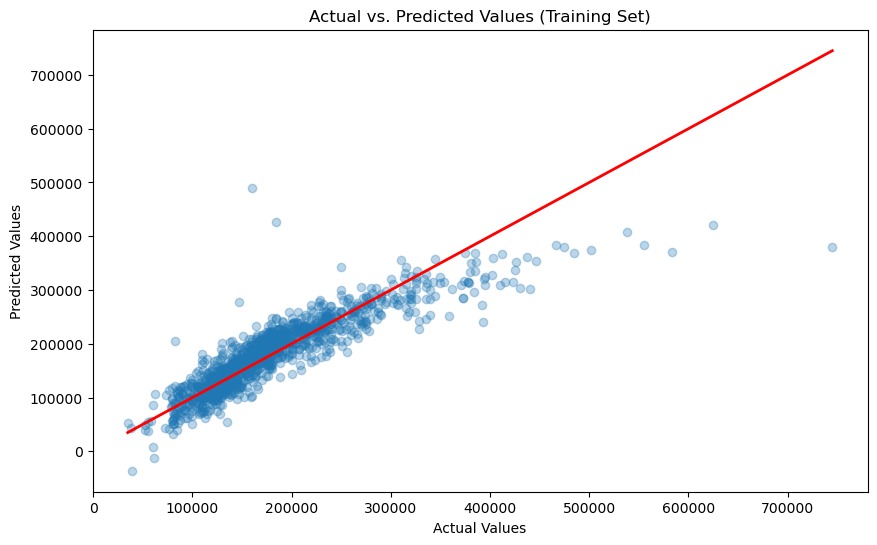

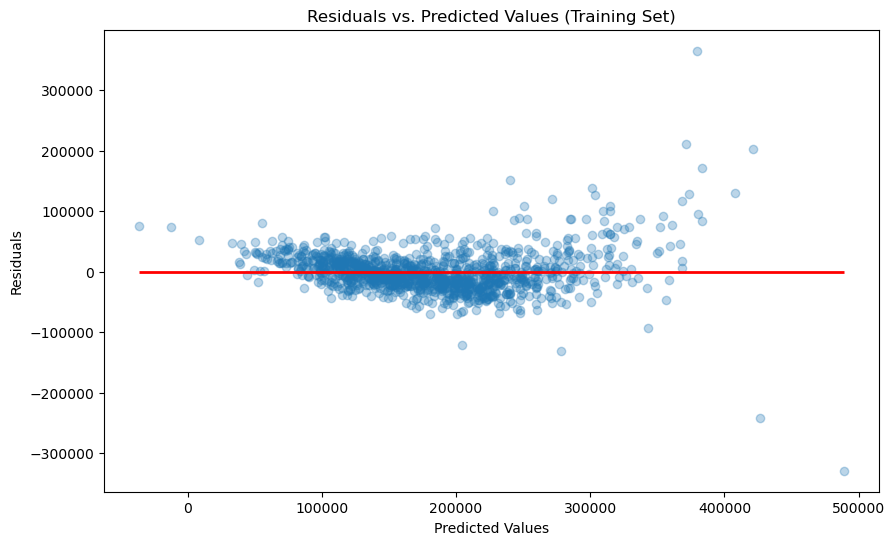

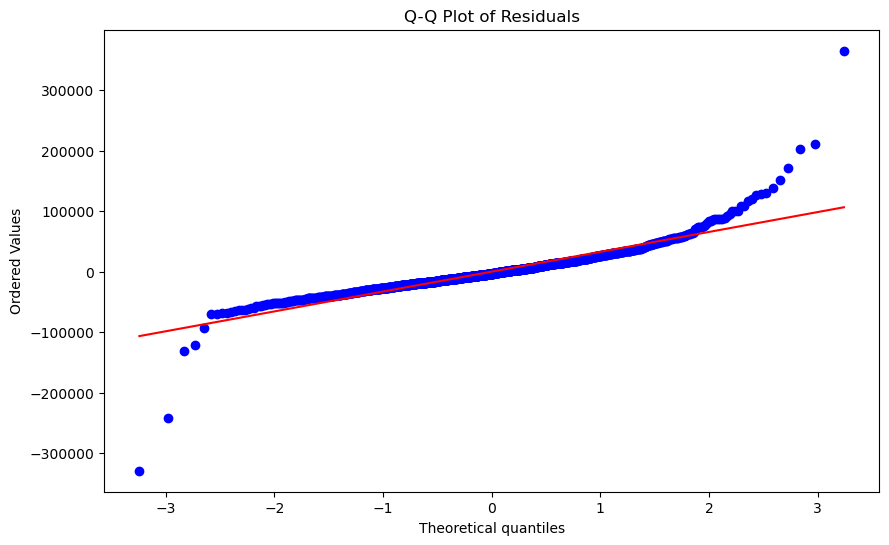

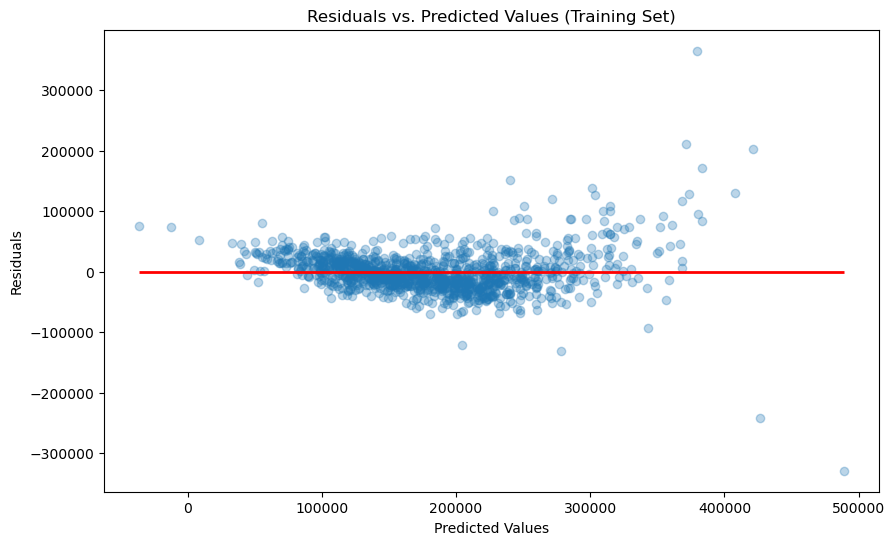

In [26]:
import scipy.stats as stats

# Linearity
plt.figure(figsize=(10, 6))
plt.scatter(y_train, y_train_pred_lr, alpha=0.3)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], color='red', linewidth=2)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values (Training Set)')
plt.show()

# Independence
residuals = y_train - y_train_pred_lr
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_lr, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_train_pred_lr.min(), xmax=y_train_pred_lr.max(), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Training Set)')
plt.show()

# Normality
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()

# Equal Variance (Homoscedasticity)
plt.figure(figsize=(10, 6))
plt.scatter(y_train_pred_lr, residuals, alpha=0.3)
plt.hlines(y=0, xmin=y_train_pred_lr.min(), xmax=y_train_pred_lr.max(), color='red', linewidth=2)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values (Training Set)')
plt.show()


#### RandomForest

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define Random Forest regressor
rf_model = RandomForestRegressor(random_state=42)

# Hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid search with cross-validation
grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)

# Best parameters and best score
print("\nRandom Forest - Best Parameters:")
print(grid_search_rf.best_params_)
print("Best CV RMSE: {:.2f}".format(np.sqrt(-grid_search_rf.best_score_)))

# Predictions using best model
best_rf_model = grid_search_rf.best_estimator_
y_train_pred_rf = best_rf_model.predict(X_train_scaled)
y_test_pred_rf = best_rf_model.predict(X_test_scaled)

# Calculate RMSE
train_rmse_rf = np.sqrt(mean_squared_error(y_train, y_train_pred_rf))
test_rmse_rf = np.sqrt(mean_squared_error(y_test, y_test_pred_rf))

print(f"\nRandom Forest:")
print(f"Training RMSE: {train_rmse_rf:.2f}")
print(f"Testing RMSE: {test_rmse_rf:.2f}")



Random Forest - Best Parameters:
{'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Best CV RMSE: 34940.56

Random Forest:
Training RMSE: 16692.76
Testing RMSE: 33856.77



Random Forest R-squared:
Training R-squared: 0.9533
Testing R-squared: 0.8506


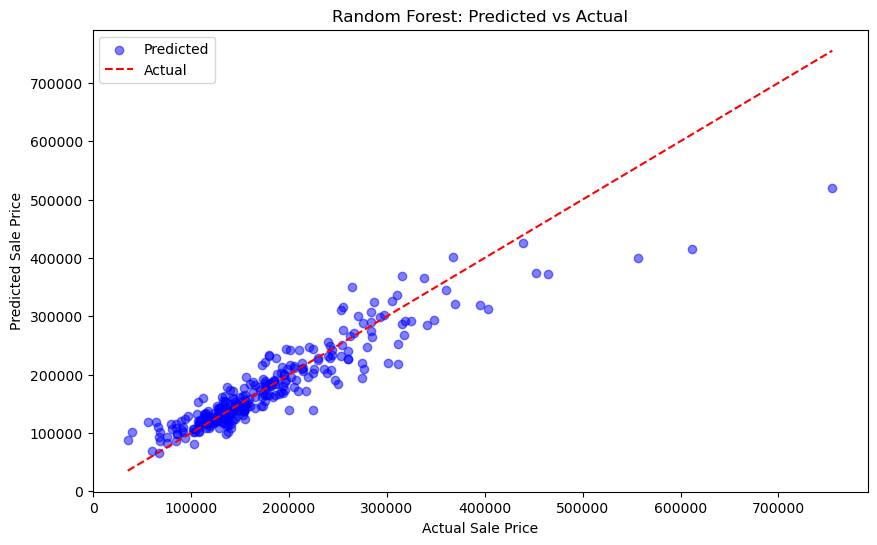

In [28]:
# Calculate R-squared score
train_r2_rf = best_rf_model.score(X_train_scaled, y_train)
test_r2_rf = best_rf_model.score(X_test_scaled, y_test)

print(f"\nRandom Forest R-squared:")
print(f"Training R-squared: {train_r2_rf:.4f}")
print(f"Testing R-squared: {test_r2_rf:.4f}")

# Compare RMSE and R-squared to assess overfitting
# If training RMSE is much lower than testing RMSE and training R-squared is significantly higher than testing R-squared, it indicates potential overfitting.

# Visualization (if needed) to compare predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_rf, color='blue', alpha=0.5, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('Random Forest: Predicted vs Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()


#### SVM


SVM - Best Parameters:
{'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}
Best CV RMSE: 41053.37

SVM:
Training RMSE: 39992.64
Testing RMSE: 46117.37
Training R-squared: 0.7318
Testing R-squared: 0.7227


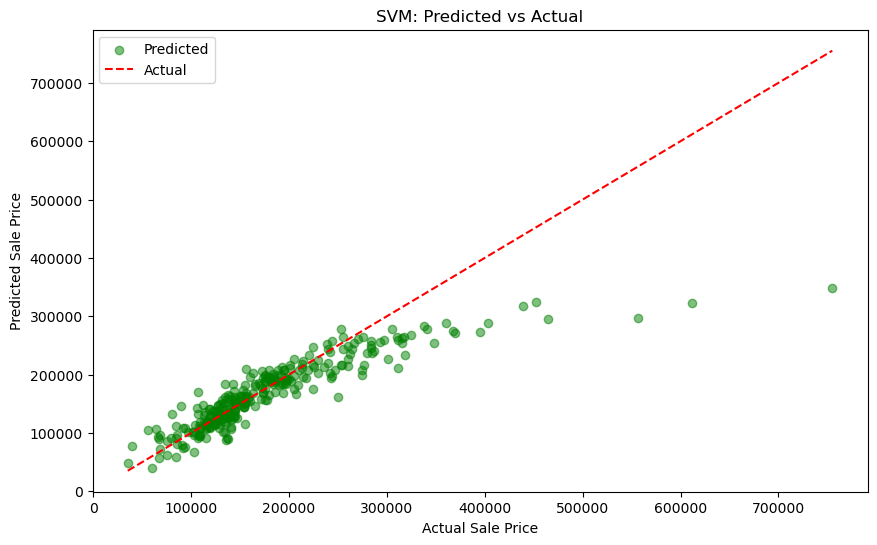

In [29]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# SVM
# Define SVM regressor
svm_model = SVR()

# Hyperparameters to tune
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.1, 0.2, 0.5, 1],
    'kernel': ['linear', 'poly', 'rbf'],
    'degree': [2, 3, 4],  # Only relevant for 'poly' kernel
}

# Grid search with cross-validation
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=param_grid_svm, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_svm.fit(X_train_scaled, y_train)

# Best parameters and best score
print("\nSVM - Best Parameters:")
print(grid_search_svm.best_params_)
print("Best CV RMSE: {:.2f}".format(np.sqrt(-grid_search_svm.best_score_)))

# Predictions using best model
best_svm_model = grid_search_svm.best_estimator_
y_train_pred_svm = best_svm_model.predict(X_train_scaled)
y_test_pred_svm = best_svm_model.predict(X_test_scaled)

# Calculate RMSE
train_rmse_svm = np.sqrt(mean_squared_error(y_train, y_train_pred_svm))
test_rmse_svm = np.sqrt(mean_squared_error(y_test, y_test_pred_svm))

# Calculate R-squared score
train_r2_svm = best_svm_model.score(X_train_scaled, y_train)
test_r2_svm = best_svm_model.score(X_test_scaled, y_test)

print(f"\nSVM:")
print(f"Training RMSE: {train_rmse_svm:.2f}")
print(f"Testing RMSE: {test_rmse_svm:.2f}")
print(f"Training R-squared: {train_r2_svm:.4f}")
print(f"Testing R-squared: {test_r2_svm:.4f}")

# Visualization of SVM predictions vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_svm, color='green', alpha=0.5, label='Predicted')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', label='Actual')
plt.title('SVM: Predicted vs Actual')
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.legend()
plt.show()

#### Classification: Build models based on at least 3 different algorithms

In [30]:
X = data.drop(columns=['Id', 'MSZoning', 'LoF'])  # Features
y = data['MSZoning'] # Target

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy: 0.8938356164383562


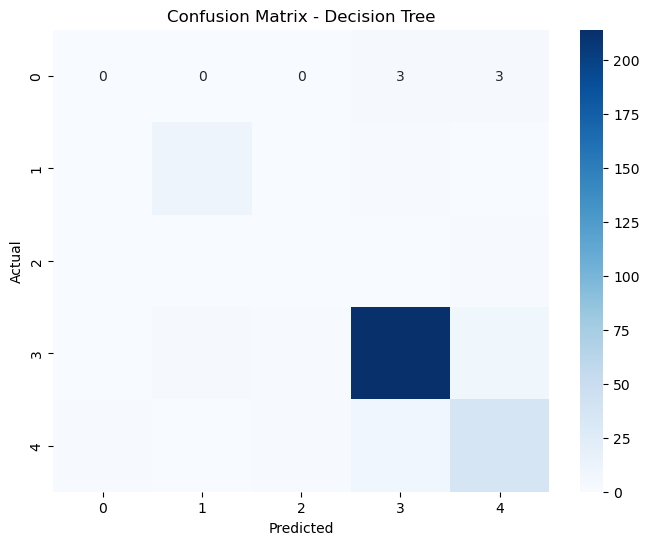

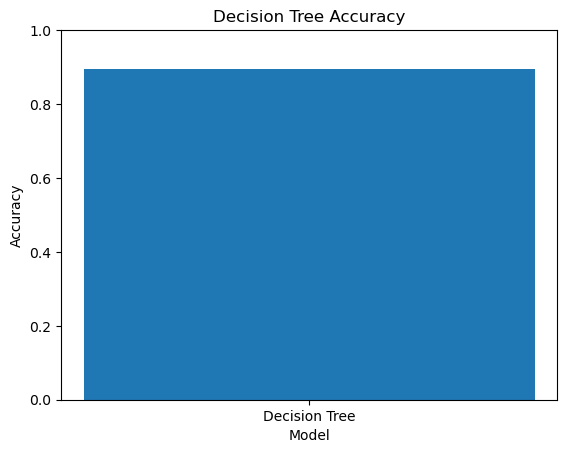

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      0.92      0.85        12
           2       0.00      0.00      0.00         1
           3       0.95      0.94      0.94       227
           4       0.73      0.78      0.76        46

    accuracy                           0.89       292
   macro avg       0.49      0.53      0.51       292
weighted avg       0.88      0.89      0.89       292



In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Fit model
dt_model.fit(X_train, y_train)

# Predict using the model
dt_pred = dt_model.predict(X_test)

# Calculate accuracy
dt_acc = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_acc}")

# Confusion matrix
cm = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Decision Tree')
plt.show()


# Visualize accuracy
plt.bar(['Decision Tree'], [dt_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy')
plt.ylim(0, 1)
plt.show()

print(classification_report(y_test, dt_pred))

SVM Accuracy: 0.7773972602739726


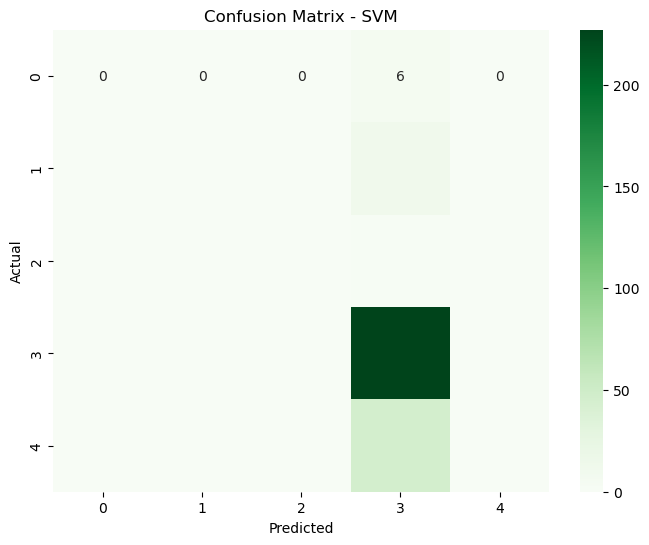

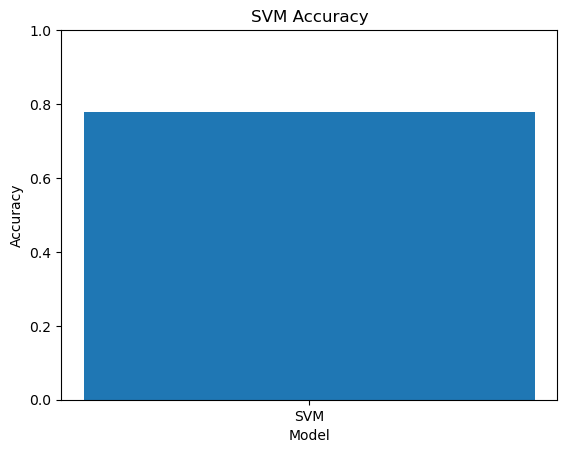

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      0.92      0.85        12
           2       0.00      0.00      0.00         1
           3       0.95      0.94      0.94       227
           4       0.73      0.78      0.76        46

    accuracy                           0.89       292
   macro avg       0.49      0.53      0.51       292
weighted avg       0.88      0.89      0.89       292



In [33]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize SVM Classifier
svm_model = SVC(random_state=42)

# Fit model
svm_model.fit(X_train, y_train)

# Predict using the model
svm_pred = svm_model.predict(X_test)

# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_acc}")

# Confusion matrix
cm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM')
plt.show()


# Visualize accuracy
plt.bar(['SVM'], [svm_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('SVM Accuracy')
plt.ylim(0, 1)
plt.show()

print(classification_report(y_test, dt_pred))

Random Forest Accuracy: 0.9178082191780822


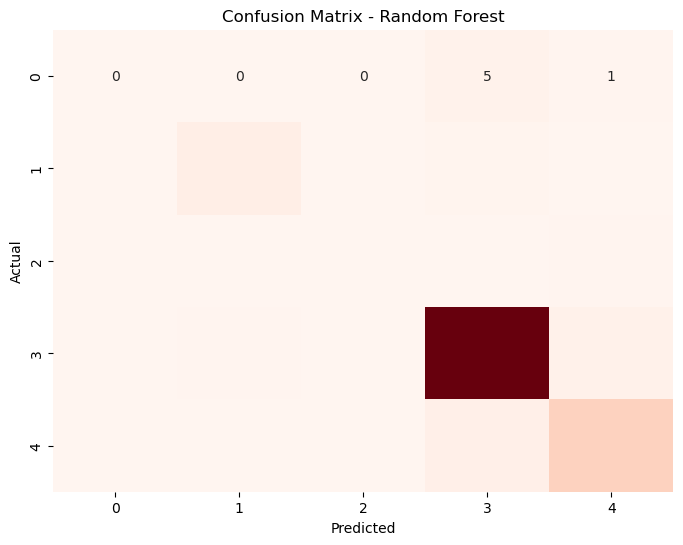

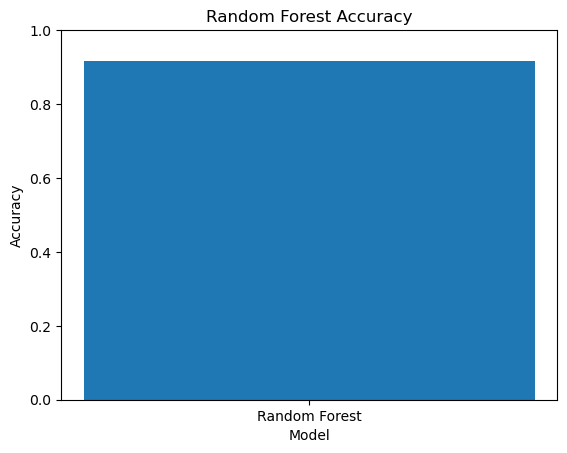

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         6
           1       0.79      0.92      0.85        12
           2       0.00      0.00      0.00         1
           3       0.95      0.94      0.94       227
           4       0.73      0.78      0.76        46

    accuracy                           0.89       292
   macro avg       0.49      0.53      0.51       292
weighted avg       0.88      0.89      0.89       292



In [34]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Fit model
rf_model.fit(X_train, y_train)

# Predict using the model
rf_pred = rf_model.predict(X_test)

# Calculate accuracy
rf_acc = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_acc}")

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

# Visualize accuracy
plt.bar(['Random Forest'], [rf_acc])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Random Forest Accuracy')
plt.ylim(0, 1)
plt.show()

print(classification_report(y_test, dt_pred))

## Result Analysis for  Regression Models

### Linear Regression
- **Training RMSE**: 35679.74
- **Testing RMSE**: 40124.08
- **Training R-squared**: 0.79
- **Testing R-squared**: 0.79

Linear Regression shows a decent performance with an R-squared value of 0.79 for both training and testing sets, indicating that the model explains about 79% of the variance in the target variable. However, the RMSE values are quite high, suggesting a considerable amount of error in prediction, especially evident in the testing set.

### Random Forest Regressor
- **Best Parameters**: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
- **Best CV RMSE**: 34940.56
- **Training RMSE**: 16692.76
- **Testing RMSE**: 33856.77

Random Forest performs significantly better than Linear Regression, as indicated by lower RMSE values on both training (16692.76) and testing (33856.77) sets. The model's ability to capture complex relationships between features and target results in improved predictive accuracy compared to linear methods.

### SVM (Support Vector Machine) Regressor
- **Best Parameters**: {'C': 100, 'degree': 2, 'epsilon': 0.1, 'kernel': 'linear'}
- **Best CV RMSE**: 41053.37
- **Training RMSE**: 39992.64
- **Testing RMSE**: 46117.37
- **Training R-squared**: 0.7318
- **Testing R-squared**: 0.7227

SVM, with a linear kernel, shows the highest RMSE values among the three models, both in training (39992.64) and testing (46117.37) sets. The R-squared values (0.7318 for training and 0.7227 for testing) are slightly lower than those of Linear Regression, indicating a comparatively weaker fit.

### Analysis and Comparison
In summary, Random Forest outperforms both Linear Regression and SVM in terms of RMSE on the testing set, suggesting it provides the most accurate predictions among the models evaluated here. Linear Regression

falls behind Random Forest in predictive accuracy, likely due to its assumption of linear relationships between features and the target variable, which may not hold in more complex datasets. SVM, while offering competitive R-squared values, exhibits higher RMSE values, indicating it struggles more with prediction errors compared to Random Forest.

In practical terms, if the primary goal is accurate prediction with minimal error, Random Forest would be the preferred choice among the three models evaluated here. Its ability to handle non-linear relationships and interactions between features makes it well-suited for a wide range of predictive tasks. However, the choice of model should also consider other factors such as computational efficiency, interpretability, and scalability depending on the specific application context.

Therefore, based on the provided metrics and analysis, **Random Forest** emerges as the best-performing model for this particular dataset, offering the lowest RMSE on the testing set and demonstrating robust predictive capabilities.


## Result Analysis for Classification Models

Three classifiers were evaluated on a multi-class classification task, each achieving varying levels of accuracy and performance metrics. Let's delve into each classifier's performance:

#### Support Vector Machine (SVM)
The SVM classifier achieved an accuracy of **77.74%**. Looking at the precision, recall, and F1-score metrics, it shows strong performance for class **1** with precision of **79%** and recall of **92%**, indicating it correctly identifies a high proportion of instances from this class. However, it struggled with class **0** and **2**, both having a precision and recall of **0%**, implying it failed to correctly classify any instances for these classes. Overall, the weighted average F1-score is **0.89**, suggesting a balanced performance across classes.

#### Decision Tree
The Decision Tree classifier slightly outperformed the SVM with an accuracy of **89.38%**. It shares similar precision and recall patterns as the SVM, with strong performance on class **1** (precision of **79%** and recall of **92%**) and deficiencies in class **0** and **2** (both with precision and recall of **0%**). The Decision Tree model's overall weighted average F1-score is **0.89**, matching that of the SVM.

#### Random Forest
The Random Forest classifier achieved the highest accuracy of **91.78%** among the three models. It maintained similar precision and recall patterns as the SVM and Decision Tree for most classes, with standout performance on class **3** (precision and recall both at **95%**), indicating strong identification of instances from this class. Like the other models, it struggled with class **0** and **2**, both showing **0%** precision and recall. The weighted average F1-score for Random Forest is **0.89**, aligning closely with SVM and Decision Tree.

### Conclusion
Across the three classifiers evaluated—SVM, Decision Tree, and Random Forest—the Random Forest model emerged as the top performer based on accuracy. However, all three models exhibited similar precision, recall, and F1-score averages, suggesting comparable overall performance. Notably, they all faced challenges with classes **0** and **2**, indicating potential areas for improvement in future iterations or with additional data.

In summary, while Random Forest showed a marginal improvement in accuracy, the choice between these models could also consider factors like interpretability (Decision Tree) and computational efficiency (SVM). Further tuning and evaluation on a broader dataset could provide deeper insights into their respective strengths and weaknesses.

---

This analysis provides a structured overview of the classifiers' performances, highlighting their accuracies and key metrics like precision and recall for each class, thereby aiding in the selection or further refinement of the model for deployment.